<span style="color:#deb66d">

---
---
---
---
---
# **Algoritmo $\rightarrow$ kNN $|$ Ensemble $\rightarrow$ Stacking**
---
---
---
---
---

</span>

| <span style="color:#ececeb"> **Descripción** </span>       | <span style="color:#ececeb"> **Detalles** </span>                   |
|-------------------------------|--------------------------------------------------------------------------------------------------|
| **Problema seleccionado**     | Flu Shot Learning (predicción relativa a las vacunas contra la gripe H1N1 y la gripe estacional) |
| **Algoritmo base**            | kNN y derivados                                                                                  |
| **Método ensemble**           | Stacking                                                                                         |
| **Fecha**                     | 26 de enero 2025                                                                                 |
| **Estudiante**                | Adrián Sánchez Carrión                                                                           |

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
---
## **1. Importación de librerías**
---
---
---
---

</span>

Lo primero que hacemos es cargar las librerías necesarias para el desarrollo del algoritmo. En este caso, utilizaremos las librerías de pandas, numpy, matplotlib, seaborn, sklearn y joblib para la carga y manipulación de datos, cálculos matemáticos, visualización y la implementación del algoritmo de kNN y el ensemble de Stacking, respectivamente.

In [2]:
import numpy as np # type: ignore
import pandas as pd # type: ignore

%matplotlib inline
import matplotlib.pyplot as plt # type: ignore
from matplotlib.patches import Patch # type: ignore
import seaborn as sns # type: ignore

import joblib # type: ignore

from IPython.display import Image, display # type: ignore

from sklearn.model_selection import GridSearchCV # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore
from sklearn.multioutput import MultiOutputClassifier # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc, make_scorer, confusion_matrix # type: ignore

from xgboost import XGBClassifier # type: ignore

Más en detalle:

- `numpy y pandas:` Librerías fundamentales para la manipulación y análisis de datos.
- `matplotlib.pyplot:` Utilizada para la visualización de datos.
- `seaborn:` Utilizada para la visualización de datos.

- `joblib:` Utilizada para guardar y cargar modelos entrenados.

- `IPython.display:` Utilizada para imágenes en el notebook.

- `sklearn.model_selection:` Contiene herramientas para dividir los datos en conjuntos de entrenamiento y prueba, y para realizar búsquedas de hiperparámetros.
- `sklearn.preprocessing:` Contiene herramientas para escalar y transformar los datos.
- `sklearn.multioutput:` Permite trabajar con problemas de salida múltiple.
- `sklearn.neighbors:` Contiene el clasificador K-Nearest Neighbors.
- `sklearn.ensemble:` Contiene el clasificador de apilamiento (Stacking Classifier).
- `sklearn.linear_model:` Contiene el modelo de regresión logística.
- `sklearn.tree:` Contiene el clasificador de árbol de decisión.
- `sklearn.metrics:` Proporciona funciones para evaluar el rendimiento de los modelos.

- `xgboost:` Implementación de Gradient Boosting.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
---
## **2. Carga y preparación específica de los datos**
---
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
---
### **2.1. Carga de los datos**
---
---
---

</span>

Una vez cargadas las librerías necesarias, pasamos a leer los datos que utilizaremos para entrenar y evaluar los algoritmos. En este caso, los datos que utilizaremos son los datos que ya hemos particionado y preprocesado previamente (entrenamiento [`preprocessed_X_training`; `partition_y_training`] y validación [`preprocessed_X_validation`; `partition_y_validation`]), junto con la partición de test, ya proporcionada por la competición y preprocesada de igual forma también por nosotros [`preprocessed_X_test`] (sabiendo que para esta partición de test no disponemos de las etiquetas).

Además tener en cuenta que tan solo se han preprocesado las particiones con los datasets de las características, ya que las etiquetas, en este caso, no necesitan ser preprocesadas dado que contienen valores binarios.

In [3]:
# Cargar las particiones preprocesadas de entrenamiento (features y labels)
X_train = pd.read_csv("../../Data/Preprocessed/Prueba4/preprocessed_X_training.csv", index_col=0)
y_train = pd.read_csv("../../Data/Preprocessed/Prueba4/partition_y_training.csv", index_col=0)

# Cargar las particiones preprocesadas de validación (features y labels)
X_val = pd.read_csv("../../Data/Preprocessed/Prueba4/preprocessed_X_validation.csv", index_col=0)
y_val = pd.read_csv("../../Data/Preprocessed/Prueba4/partition_y_validation.csv", index_col=0)

# Cargar la partición preprocesada de test (features)
X_test = pd.read_csv("../../Data/Preprocessed/Prueba4/preprocessed_X_test.csv", index_col=0)

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
---
### **2.2. Comprobación de la estructura de los datos cargados**
---
---
---

</span>

Una vez cargados los datos, pasamos a comprobar la estructura de los mismos para ver si han sido cargados correctamente. Para ello, comenzamos comprobando el número de filas y columnas de los mismos:

In [4]:
# Ver el tamaño de los datos
print(f'Training Features shape: {X_train.shape}')
print(f'Training Labels shape: {y_train.shape}')
print(f'Validation Features shape: {X_val.shape}')
print(f'Validation Labels shape: {y_val.shape}')
print(f'Test Features shape: {X_test.shape}')

Training Features shape: (21365, 96)
Training Labels shape: (21365, 2)
Validation Features shape: (5342, 96)
Validation Labels shape: (5342, 2)
Test Features shape: (26708, 96)


Y ahora, visualizamos las primeras filas de cada conjunto de datos para comprobar que los datos han sido cargados correctamente. Primero visualizamos las primeras filas de los datos de entrenamiento:

In [5]:
# Mostramos los primeros registros de la partición de características de entrenamiento
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
12230,2.0,2.0,0,1,0,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8871,1.0,1.0,0,0,0,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2390,1.0,1.0,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9227,2.0,1.0,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9064,2.0,1.0,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Ahora, visualizamos las primeras de las etiquetas de los datos de entrenamiento:

In [6]:
# Mostramos los primeros registros de la partición de etiquetas de entrenamiento
y_train.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
12230,0,1
8871,0,1
2390,0,1
9227,0,0
9064,0,0


Adicionalmente, podemos visualizar la proporción de valores por cada clase en cada etiqueta del dataset de entrenamiento:

In [7]:
# Proporción de 1s y 0s en la variable objetivo h1n1_vaccine
print(f"Proporción de 1s en h1n1_vaccine: {y_train[y_train['h1n1_vaccine'] == 1].shape[0] / y_train.shape[0]}")
print(f"Proporción de 0s en h1n1_vaccine: {y_train[y_train['h1n1_vaccine'] == 0].shape[0] / y_train.shape[0]}", end="\n\n")

# Proporción de 1s y 0s en la variable objetivo seasonal_vaccine
print(f"Proporción de 1s en seasonal_vaccine: {y_train[y_train['seasonal_vaccine'] == 1].shape[0] / y_train.shape[0]}")
print(f"Proporción de 0s en seasonal_vaccine: {y_train[y_train['seasonal_vaccine'] == 0].shape[0] / y_train.shape[0]}")

Proporción de 1s en h1n1_vaccine: 0.21245026913175755
Proporción de 0s en h1n1_vaccine: 0.7875497308682424

Proporción de 1s en seasonal_vaccine: 0.4655745377954599
Proporción de 0s en seasonal_vaccine: 0.5344254622045401


Donde vemos que principalmente la vacuna H1H1 dispone de clases muy desbalanceadas, mientras que la vacuna estacional dispone de clases más balanceadas.

Hacemos lo mismo con los datos de validación. Primero mostramos las primeras filas de la partición de características para validación:

In [8]:
# Mostramos los primeros registros de la partición de características de validación
X_val.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
22317,1.0,1.0,0,1,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1215,2.0,2.0,0,1,0,1,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10540,2.0,1.0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7407,3.0,1.0,0,1,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14697,1.0,1.0,0,1,0,1,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Y visualizamos las primeras de las etiquetas de los datos de validación:

In [9]:
# Mostramos los primeros registros de la partición de etiquetas de entrenamiento
y_val.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0,1
1215,0,1
10540,0,0
7407,0,0
14697,0,0


De igual modo, podemos visualizar la proporción de valores por cada clase en cada etiqueta del dataset de validación:

In [10]:
# Proporción de 1s y 0s en la variable objetivo h1n1_vaccine
print(f"Proporción de 1s en h1n1_vaccine: {y_val[y_val['h1n1_vaccine'] == 1].shape[0] / y_val.shape[0]}")
print(f"Proporción de 0s en h1n1_vaccine: {y_val[y_val['h1n1_vaccine'] == 0].shape[0] / y_val.shape[0]}", end="\n\n")

# Proporción de 1s y 0s en la variable objetivo seasonal_vaccine
print(f"Proporción de 1s en seasonal_vaccine: {y_val[y_val['seasonal_vaccine'] == 1].shape[0] / y_val.shape[0]}")
print(f"Proporción de 0s en seasonal_vaccine: {y_val[y_val['seasonal_vaccine'] == 0].shape[0] / y_val.shape[0]}")

Proporción de 1s en h1n1_vaccine: 0.21246724073380757
Proporción de 0s en h1n1_vaccine: 0.7875327592661925

Proporción de 1s en seasonal_vaccine: 0.46574316735305127
Proporción de 0s en seasonal_vaccine: 0.5342568326469487


Finalmente, mostramos las primeras filas de los datos que contienen las características de la partición de test:

In [11]:
# Mostramos los primeros registros de la partición de características de test
X_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0,1,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26708,1.0,1.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26709,2.0,2.0,0,0,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26710,1.0,1.0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26711,3.0,1.0,1,1,0,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
---
### **2.3. Normalización de los datos**
---
---
---

</span>

Una vez hecho esto, adicionalmente al proceso realizado en el preprocesamiento común, para aplicar de forma óptima el algoritmo de kNN, es necesario normalizar los datos. Para ello, utilizamos la función `MinMaxScaler` de la librería `sklearn.preprocessing` para normalizar los datos de entrenamiento y posteriormente normalizar los datos de test con los mismos valores de normalización que los datos de entrenamiento.

Mencionar, que hemos preferido emplear la normalización Min-Max en lugar de la estandarización, ya que no tenemos evidencias para afirmar que los datos siguen una distribución normal, por lo que podría ser más adecuada la normalización Min-Max.

In [12]:
# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Escalamos los datos de validación
X_val_scaled = scaler.transform(X_val)

# Escalamos los datos de test
X_test_scaled = scaler.transform(X_test)

Ahora, podemos comprobar que los datos han sido normalizados correctamente intentando visualizar los resultados obtenidos:

In [13]:
# Mostramos el resultado de normalizar las variables numéricas
X_train_scaled

array([[0.5       , 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ]])

Así, podemos ver que parece ser que los datos si han sufrido una normalización, pero dado el formato matricial, resulta dificil comprobarlo de forma clara. Por lo que vemos que ahora, en lugar de tener un DataFrame de pandas, tenemos un array de numpy, por lo que podemos convertirlo de nuevo a un DataFrame de pandas para poder visualizar los datos de forma más cómoda.

In [14]:
# Convertir el array normalizado a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Y ahora sí, podemos comprobar que los datos han sido normalizados correctamente de forma más sencilla:

In [15]:
# Mostramos los primeros registros del dataset con cada una de las características de entrenamiento una vez normalizadas
X_train_scaled_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
12230,0.50,0.666667,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8871,0.25,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2390,0.25,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9227,0.50,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9064,0.50,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Visualizamos también los datos de validación normalizados:

In [16]:
# Mostramos los primeros registros del dataset con cada una de las características de validación una vez normalizadas
X_val_scaled_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
22317,0.25,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1215,0.50,0.666667,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10540,0.50,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7407,0.75,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14697,0.25,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Y finalmente hacemos lo mismo para los datos de test:

In [17]:
# Mostramos los primeros registros del dataset con cada una de las características de validación una vez normalizadas
X_test_scaled_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,0.50,0.666667,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26708,0.25,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26709,0.50,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26710,0.25,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26711,0.75,0.333333,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Por último, nos podemos asegurar de que todos los datos son numéricos, hecho necesario para poder aplicar el algoritmo de kNN:

In [18]:
# Asegurarse de que todas las columnas sean del tipo correcto
X_train_scaled_df = X_train_scaled_df.astype(float)
X_val_scaled_df = X_val_scaled_df.astype(float)
X_test_scaled_df = X_test_scaled_df.astype(float)
y_train = y_train.astype(int)
y_val = y_val.astype(int)

Ahora, antes de pasar a entrenar los modelos, vamos a cambiar la nomenclatura de las variables normalizadas, por la que teníamos inicialmente, con el fin de hacer el proceso más intuitivo y homogéneo.

In [19]:
# Modificamos la nomenclatura de las variables
X_train_df = X_train_scaled_df
X_val_df = X_val_scaled_df
X_test_df = X_test_scaled_df

Además, vamos a convertir estos DataFrames a arrays de numpy, ya que el algoritmo de kNN trabaja mejor con este tipo de estructuras al ser más sencillas y rápidas de procesar.

In [20]:
# Trasformar los datos a arrays
X_train = X_train_df.values
X_val = X_val_df.values
X_test = X_test_df.values

Y así, tenemos los siguientes datos con los que trabajaremos:

In [21]:
# Verificar tamaños
print(f"Para X -> Tamaño de Train: {X_train.shape}, Validación: {X_val.shape}, Test: {X_test.shape}")
print(f"Para y -> Tamaño de Train: {y_train.shape}, Validación: {y_val.shape}")

Para X -> Tamaño de Train: (21365, 96), Validación: (5342, 96), Test: (26708, 96)
Para y -> Tamaño de Train: (21365, 2), Validación: (5342, 2)


Realizado todo esto, ahora sí, pasamos a entrenar los modelos.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
---
## **3. kNN**
---
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
---
### **3.1. Búsqueda del mejor modelo**
---
---
---

</span>

Ahora, con todos los pasos posteriores realizados, ya estamos listos para implementar el algoritmo kNN.

Para ello, lo que vamos a hacer es definir un clasificador K-Nearest Neighbors (`KNeighborsClassifier`) y envolverlo en un `MultiOutputClassifier` para manejar múltiples salidas. Luego, definimos una cuadrícula de parámetros (`param_grid`) que incluye diferentes métricas de distancia, números de vecinos y tipos de pesos. 

Después, creamos un objeto GridSearchCV para realizar una búsqueda en la cuadrícula de parámetros con validación cruzada de 10 pliegues (`cv=10`). Además, empleamos un scorer personalizado para configurar cómo se evalúa el desempeño del modelo durante el proceso de búsqueda de hiperparámetros con `GridSearchCV`. De esta manera, este scorer personalizado permite optimizar el modelo de manera confiable y representativa en un contexto desbalanceado (por ello empleamos el parámetro `average='weighted'`), garantizando que los hiperparámetros seleccionados conduzcan a un modelo que funcione bien en todas las etiquetas, no solo en las mayoritarias.

In [26]:
# Definir el clasificador KNN
knn = KNeighborsClassifier()

# Definir el clasificador multi-target
multi_target_knn = MultiOutputClassifier(knn)

# Definir los hiperparámetros
param_grid = {
    'estimator__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'estimator__n_neighbors': [3, 5, 7, 9, 11],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]  # Para métricas basadas en Minkowski
}

# Crear un scorer personalizado con zero_division=1
f1_scorer = make_scorer(f1_score, average='weighted', zero_division=1)

# Búsqueda de hiperparámetros con validación cruzada
grid_knn = GridSearchCV(
    multi_target_knn, 
    param_grid, 
    cv=10, 
    scoring=f1_scorer, 
    n_jobs=-1
)

Y ahora, una vez definido el modelo, pasamos a entrenarlo con los datos de entrenamiento normalizados. Posteriormente imprimimos los mejores hiperparámetros encontrados por la búsqueda de la cuadrícula de parámetros y guardamos el modelo entrenado en un archivo `.pkl` para poder cargarlo posteriormente sin necesidad de volver a entrenarlo.

In [27]:
# Ajustar el modelo
grid_knn.fit(X_train, y_train)

# Guardar el modelo
joblib.dump(grid_knn, "../../Algorithms/Prueba4.1/knn_model.pkl")

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros KNN:", grid_knn.best_params_)

Mejores hiperparámetros KNN: {'estimator__metric': 'manhattan', 'estimator__n_neighbors': 11, 'estimator__p': 1, 'estimator__weights': 'distance'}


En este caso, vemos que los mejores hiperparámetros encontrados son los siguientes:

- `estimator__metric`: `'manhattan'`: Esta métrica de distancia se refiere a la distancia de Manhattan (también conocida como distancia L1). Es la suma de las diferencias absolutas entre las coordenadas de los puntos.

- `estimator__n_neighbors`: `11`: Este parámetro indica el número de vecinos más cercanos que se considerarán para hacer la predicción. En este caso, se utilizarán los 11 vecinos más cercanos.

- `estimator__p`: `1`: Este parámetro se utiliza en la métrica de Minkowski. Cuando `p=1`, la métrica de Minkowski es equivalente a la distancia de Manhattan.

- `estimator__weights`: `'distance'`: Este parámetro indica cómo se ponderan los vecinos. `'distance'` significa que los vecinos más cercanos tienen un mayor peso en la predicción que los vecinos más lejanos.

En resumen, los mejores hiperparámetros indican que el modelo KNN utilizará la distancia de Manhattan para calcular las distancias, considerará los 11 vecinos más cercanos, utilizará la métrica de Manhattan (equivalente a `p=1` en Minkowski) y ponderará los vecinos en función de su distancia.

Tras probar diferentes combinaciones de hiperparámetros, hemos encontrado que estos son los que mejor se ajustan a los datos de entrenamiento.

Ahora, una vez ajustado el modelo y encontrados los mejores hiperparámetros, mediante el siguiente gráfico podemos visualizar cómo evolucionan los valores promedio del F1-score durante la validación cruzada para las diferentes combinaciones de hiperparámetros evaluadas:

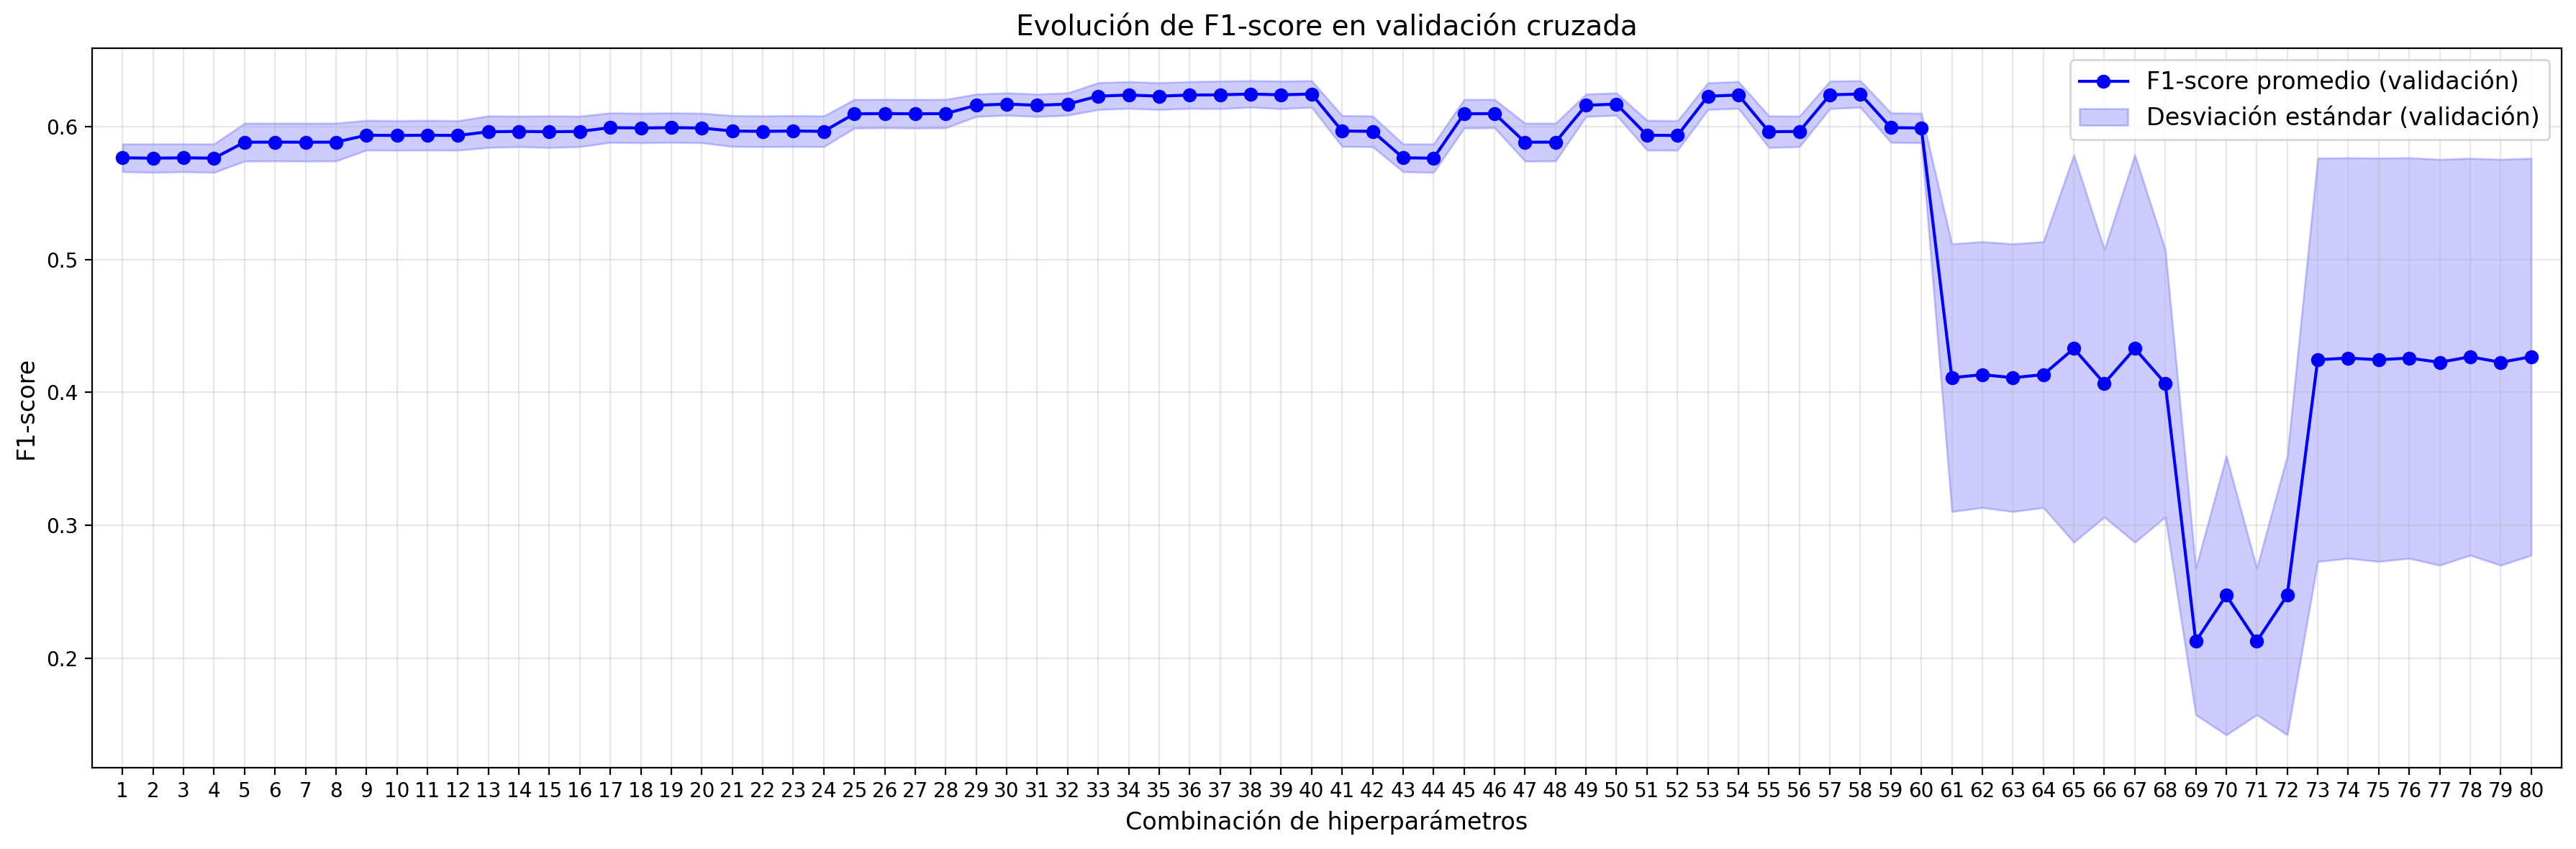

In [28]:
# Extraer los resultados de la validación cruzada
cv_results = grid_knn.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
param_combinations = range(1, len(mean_test_scores) + 1)  # Índices de combinaciones

# Crear el gráfico
plt.figure(figsize=(18, 6), dpi=200)
plt.plot(param_combinations, mean_test_scores, label='F1-score promedio (validación)', marker='o', color='blue')
plt.fill_between(param_combinations, 
                 mean_test_scores - std_test_scores, 
                 mean_test_scores + std_test_scores, 
                 color='blue', alpha=0.2, label='Desviación estándar (validación)')

# Personalización del gráfico
plt.title('Evolución de F1-score en validación cruzada', fontsize=14)
plt.xlabel('Combinación de hiperparámetros', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.xticks(param_combinations)
plt.xlim([0, len(param_combinations) + 1])
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La línea azul representa el F1-score promedio obtenido en las particiones de validación cruzada para cada configuración de hiperparámetros, mientras que la banda sombreada alrededor de la línea muestra la desviación estándar de los F1-scores, lo que indica la variabilidad del rendimiento del modelo entre las particiones.

Este gráfico permite identificar qué combinaciones de hiperparámetros proporcionaron el mejor rendimiento promedio y qué tan consistentes fueron los resultados. Si el intervalo de desviación estándar es estrecho, significa que el modelo tuvo un rendimiento estable en las particiones de validación, lo que sugiere una buena generalización. Por otro lado, una banda amplia podría indicar que el rendimiento del modelo es sensible a los datos de entrenamiento o validación. En este caso, analizar los puntos más altos en la curva puede ayudar a seleccionar configuraciones prometedoras para realizar pruebas finales en el conjunto de test.

Podemos, de igual forma crear una tabla con los resultados obtenidos en la búsqueda de hiperparámetros para tener una visión más clara de los resultados obtenidos:

In [29]:
# Crear un DataFrame con las combinaciones de hiperparámetros y F1-score
results_df = pd.DataFrame(grid_knn.cv_results_)

# Seleccionar hiperparámetros utilizados y la métrica de interés
table = results_df[
    ['param_estimator__metric', 
     'param_estimator__n_neighbors', 
     'param_estimator__weights', 
     'param_estimator__p', 
     'mean_test_score', 
     'std_test_score']
]

# Renombrar columnas para mayor claridad
table.columns = ['Metric', 'Neighbors', 'Weights', 'Minkowski_p', 'Mean F1-Score', 'Std F1-Score']

# Ordenar por el F1-score promedio
table = table.sort_values(by='Mean F1-Score', ascending=False)

# Opcional: Exportar la tabla a un archivo CSV
table.to_csv('../../Data/Tablas/Prueba4.1/knn_hyperparameter_results.csv', index=False)

Así, ordenando estos resultados por el F1-score promedio, podemos ver que la mejor combinación de hiperparámetros coincide con la que hemos encontrado anteriormente y además, podemos ver otros resuldatos interesantes que nos pueden ayudar a entender cómo se comporta el modelo con diferentes configuraciones de hiperparámetros.

In [30]:
# Mostrar las primeras filas de la tabla
table.head(10)

,Metric,Neighbors,Weights,Minkowski_p,Mean F1-Score,Std F1-Score
57,minkowski,11,distance,1,0.624599,0.010024
37,manhattan,11,distance,1,0.624599,0.010024
39,manhattan,11,distance,2,0.624599,0.010024
36,manhattan,11,uniform,1,0.623943,0.010412
38,manhattan,11,uniform,2,0.623943,0.010412
56,minkowski,11,uniform,1,0.623943,0.010412
35,manhattan,9,distance,2,0.623815,0.010098
33,manhattan,9,distance,1,0.623815,0.010098
53,minkowski,9,distance,1,0.623815,0.010098
52,minkowski,9,uniform,1,0.622974,0.010116


$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
---
### **3.2. Evaluación con el mejor modelo**
---
---
---

</span>

Como hemos dicho, ahora vamos a emplear el modelo obtenido anteriormente con los mejores hiperparámetros para evaluar su rendimiento en el conjunto de validación. Para ello, primero obtenemos el mejor modelo encontrado por `GridSearchCV` y lo guardamos en un archivo utilizando `joblib`. Esto nos permitirá reutilizar el modelo entrenado sin tener que volver a entrenarlo en el futuro.

In [31]:
# Obtener el mejor modelo
knn_best = grid_knn.best_estimator_

# Guardar el modelo entrenado
joblib.dump(knn_best, '../../Algorithms/Prueba4.1/knn_best_model.pkl')

['../../Algorithms/Prueba4.1/knn_best_model.pkl']

En el caso de que fuera necesario, dichos modelos (el entrenado y el mejor modelo) los podríamos cargar de la siguiente forma:

In [22]:
# Cargamos el modelo entrenado
grid_knn = joblib.load('../../Algorithms/Prueba4.1/knn_model.pkl')

# Cargamos el mejor modelo
knn_best = joblib.load('../../Algorithms/Prueba4.1/knn_best_model.pkl')

$\ $

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
---
#### **3.2.1. Predicción de las etiquetas de clase (predict)**
---
---

</span>

Una vez guardado el modelo, lo cargamos y realizamos predicciones sobre el conjunto de validación. Para ello, empleamos el método `predict` del modelo, que nos devolverá las predicciones realizadas sobre el conjunto de validación.

Así, la función `knn_best.predict(X_val)` devuelve las etiquetas de clase predichas para cada muestra en el conjunto de validación. Es decir, para cada muestra, proporciona la clase que el modelo considera más probable. Esto es útil cuando solo necesitamos las etiquetas de clase predichas.

En este problema concreto, dado que el problema es de múltiples etiquetas (multi-output) donde tenemos que predecir más de una variable de salida, el proceso es similar al de un problema de clasificación estándar, pero se aplica a cada variable de salida por separado. Aquí es donde el uso de `MultiOutputClassifier` es útil, ya que permite manejar múltiples salidas simultáneamente.

Por lo que en este caso, `knn_best.predict(X_val)` devolverá una matriz donde cada fila corresponde a una muestra y cada columna a una variable de salida. Cada valor en la matriz será la etiqueta predicha para la muestra correspondiente y la variable de salida correspondiente.

In [23]:
# Evaluar KNN en el conjunto de validación
knn_preds = knn_best.predict(X_val)

Una vez realizadas las predicciones sobre el conjunto de validación, podemos evaluar el rendimiento del modelo. Para ello, primero convertimos los resultados obtenidos en un DataFrame de pandas para poder visualizarlos de forma más cómoda, con los correspondientes nombres de las columnas dados por las respectivas etiquetas. Además, guardamos las predicciones en un archivo CSV, en caso de que queramos cargarlas en el futuro.

In [34]:
# Convertir las predicciones a un DataFrame de pandas
knn_preds_df = pd.DataFrame(knn_preds, columns=['h1n1_vaccine', 'seasonal_vaccine'], index=X_val_df.index)

# Guardar el DataFrame en un archivo CSV
knn_preds_df.to_csv('../../Data/Algorithms/Prueba4.1/knn_preds.csv', index=True)

Mostrar las primeras filas de las predicciones realizadas:

In [35]:
knn_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0,0
1215,0,1
10540,0,0
7407,0,1
14697,0,0


Ahora sí, podemos evaluar el rendimiento del modelo. Para ello, empleamos la métrica de evaluación `accuracy_score` de la librería `sklearn.metrics`, que nos permite calcular la precisión de las predicciones realizadas por el modelo y `classification_report` para obtener un informe más detallado de la precisión, recall, f1-score y support de las predicciones realizadas.

In [36]:
# Calcular y mostrar la exactitud
print("Accuracy en validación:", accuracy_score(y_val, knn_preds), end="\n\n")

# Calcular y mostrar el F1-score
f1 = f1_score(y_val, knn_preds, average='weighted', zero_division=0)
print("F1 Score (weighted):", f1)

# Calcular y mostrar la precisión
precision = precision_score(y_val, knn_preds, average='weighted', zero_division=0)
print("Precision (weighted):", precision)

# Calcular y mostrar el recall
recall = recall_score(y_val, knn_preds, average='weighted', zero_division=0)
print("Recall (weighted):", recall, end="\n\n")

# Calcular y mostrar el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_val, knn_preds, zero_division=0))

Accuracy en validación: 0.6023961063272183

F1 Score (weighted): 0.6138069975638539
Precision (weighted): 0.693210408279402
Recall (weighted): 0.5719017388904223

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.69      0.34      0.45      1135
           1       0.70      0.68      0.69      2488

   micro avg       0.69      0.57      0.63      3623
   macro avg       0.69      0.51      0.57      3623
weighted avg       0.69      0.57      0.61      3623
 samples avg       0.31      0.29      0.29      3623



Los resultados obtenidos muestran que el modelo KNN tiene una precisión de validación de 60.24%. El reporte de clasificación indica que el modelo tiene una precisión de 0.69 para la clase 0 y de 0.70 para la clase 1. Sin embargo, el recall para la clase 0 es bastante bajo (0.34), lo que sugiere que el modelo tiene dificultades para identificar correctamente los casos de la clase 0.

El f1-score, que es una medida combinada de precisión y recall, es de 0.45 para la clase 0 y de 0.69 para la clase 1. En general, el modelo parece funcionar mejor para la clase 1 que para la clase 0. La media ponderada (weighted avg) del f1-score es de 0.61, lo que indica un rendimiento moderado del modelo en general.

Como aclaración, cada una de estas métricas hacen referencia a lo siguiente:

  - **Accuracy:** es la proporción de predicciones correctas que ha realizado el modelo. Mide la capacidad del modelo para predecir correctamente la clase de una muestra. Una precisión alta significa que el modelo comete pocos errores al predecir la clase de las muestras. El valor de exactitud en validación de 0.603272 significa que el modelo KNN predijo correctamente aproximadamente el 60.24% de las instancias en el conjunto de validación (`y_val`). Esto indica que el modelo tiene una tasa de aciertos del 60.33% en los datos de validación.

  - **Precisión:** es la proporción de verdaderos positivos entre todos los casos que el modelo ha clasificado como positivos. En otras palabras, mide la exactitud de las predicciones positivas del modelo. Una precisión alta significa que el modelo comete pocos errores al predecir la clase positiva.

  - **Recall:** también conocido como sensibilidad o tasa de verdaderos positivos, es la proporción de verdaderos positivos entre todos los casos que realmente son positivos. Mide la capacidad del modelo para identificar correctamente todos los casos positivos. Un recall alto significa que el modelo detecta la mayoría de los casos positivos.

  - **f1-score:** es la media armónica de la precisión y el recall. Proporciona una única métrica que equilibra ambos aspectos, siendo útil cuando se necesita un balance entre precisión y recall. Un f1-score alto indica que el modelo tiene tanto una alta precisión como un alto recall.

  - **Support:** es el número de ocurrencias reales de cada clase en el conjunto de datos. Proporciona contexto sobre cuántos ejemplos de cada clase hay, lo cual es importante para interpretar las otras métricas. Por ejemplo, si una clase tiene un support bajo, las métricas asociadas a esa clase pueden ser menos confiables.

En este caso, dado que las clases están muy desbalanceadas y la clase positiva tiene muchos menos valores, la métrica de exactitud (accuracy) puede no ser la más adecuada para evaluar el rendimiento del modelo. La exactitud puede ser engañosa en problemas de clasificación desbalanceados porque un modelo que predice siempre la clase mayoritaria puede tener una alta exactitud pero un rendimiento pobre en la clase minoritaria.

En lugar de la exactitud, es más apropiado enfocarse en métricas como el F1-Score, la precisión y el recall. Estas métricas proporcionan una mejor comprensión del rendimiento del modelo en la clase minoritaria.

Por lo tanto, en este caso, se recomienda utilizar el F1-Score como la métrica principal para evaluar el rendimiento del modelo, ya que proporciona un equilibrio entre la precisión y el recall y es más adecuada para problemas de clasificación desbalanceados. Además, se pueden considerar la precisión y el recall individualmente para obtener una comprensión más detallada del rendimiento del modelo en la clase minoritaria.

Así, dado que las clases están muy desbalanceadas y la clase positiva tiene muchos menos valores, el F1 Score (weighted) de 0.61 indica que el modelo tiene un rendimiento moderado en general, considerando tanto la precisión como el recall ponderados por el soporte de cada clase. Este valor sugiere que el modelo es capaz de manejar la clasificación de ambas clases, pero no de manera óptima. Para mejorar este rendimiento, probaremos estrategias adicionales a las ya implementadas con este algoritmo, investigando el ensamble de modelos, (es este caso stacking), para ver si podemos mejorar el rendimiento del modelo.

Más en detalle, podemos ver el reporte de clasificación de forma individualizada para cada etiqueta:

In [37]:
# Calcular y mostrar el reporte de clasificación para cada etiqueta
print("Reporte de clasificación para h1n1_vaccine:\n", 
      classification_report(y_val['h1n1_vaccine'], knn_preds[:, 0], zero_division=0))
print("Reporte de clasificación para seasonal_vaccine:\n", 
      classification_report(y_val['seasonal_vaccine'], knn_preds[:, 1], zero_division=0))

Reporte de clasificación para h1n1_vaccine:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      4207
           1       0.69      0.34      0.45      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.65      0.68      5342
weighted avg       0.81      0.83      0.80      5342

Reporte de clasificación para seasonal_vaccine:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      2854
           1       0.70      0.68      0.69      2488

    accuracy                           0.71      5342
   macro avg       0.71      0.71      0.71      5342
weighted avg       0.71      0.71      0.71      5342



Donde vemos un mejor rendimiento para para la vacuna H1H1 que para la vacuna estacional, en cuanto a la clase 0, pero por ejemplo con la clase 1, sucede lo contrario. En conclusión, los resultados del reporte de clasificación muestran que el modelo tiene un buen rendimiento en la predicción de la etiqueta `h1n1_vaccine`, con una precisión de 0.84 y un recall de 0.96 para la clase 0 (no vacunado), pero un rendimiento menor para la clase 1 (vacunado) con una precisión de 0.69 y un recall de 0.34. El F1-score general para `h1n1_vaccine` es de 0.80. Para la etiqueta `seasonal_vaccine`, el modelo muestra un rendimiento más equilibrado entre las clases, con una precisión de 0.73 y un recall de 0.74 para la clase 0, y una precisión de 0.70 y un recall de 0.68 para la clase 1. El F1-score general para `seasonal_vaccine` es de 0.71. La precisión global del modelo es de 0.81 para `h1n1_vaccine` y de 0.71 para `seasonal_vaccine`, indicando un rendimiento aceptable en ambas tareas de clasificación.

Para acabar, podemos observar la matriz de confusión para tener una visión más clara de cómo se han clasificado las muestras para cada etiqueta:

Proporción de 1s en h1n1_vaccine: 1135
Proporción de 0s en h1n1_vaccine: 4207

Proporción de 1s en seasonal_vaccine: 2488
Proporción de 0s en seasonal_vaccine: 2854


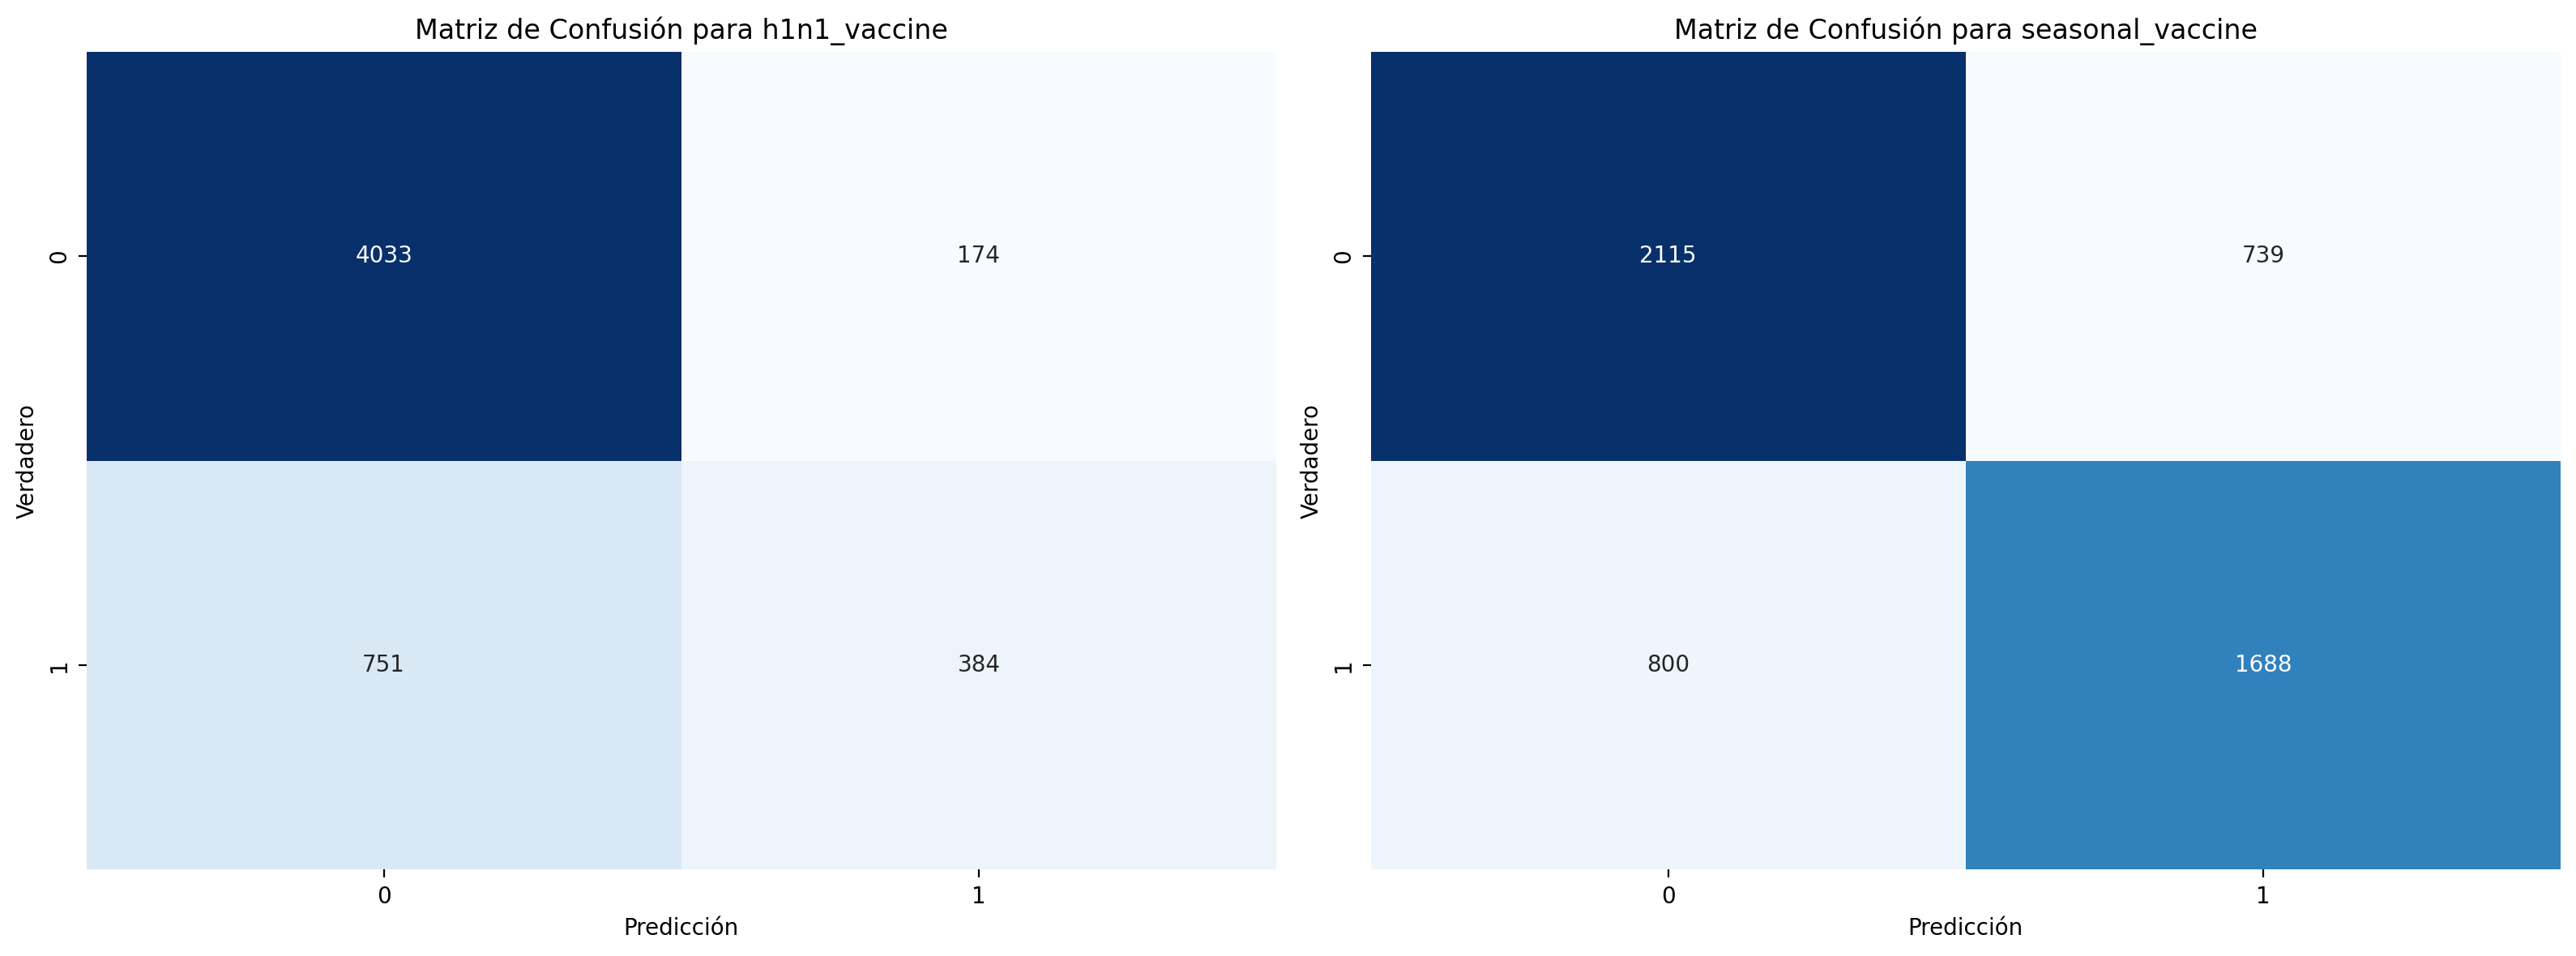

In [38]:
# Proporción de 1s y 0s en la variable objetivo h1n1_vaccine
print(f"Proporción de 1s en h1n1_vaccine: {y_val[y_val['h1n1_vaccine'] == 1].shape[0]}")
print(f"Proporción de 0s en h1n1_vaccine: {y_val[y_val['h1n1_vaccine'] == 0].shape[0]}", end="\n\n")

# Proporción de 1s y 0s en la variable objetivo seasonal_vaccine
print(f"Proporción de 1s en seasonal_vaccine: {y_val[y_val['seasonal_vaccine'] == 1].shape[0]}")
print(f"Proporción de 0s en seasonal_vaccine: {y_val[y_val['seasonal_vaccine'] == 0].shape[0]}")

# Calcular la matriz de confusión para h1n1_vaccine
conf_matrix_h1n1 = confusion_matrix(y_val['h1n1_vaccine'], knn_preds[:, 0])

# Calcular la matriz de confusión para seasonal_vaccine
conf_matrix_seasonal = confusion_matrix(y_val['seasonal_vaccine'], knn_preds[:, 1])

# Crear una figura con dos subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=200)

# Graficar la matriz de confusión para h1n1_vaccine
sns.heatmap(conf_matrix_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
ax[0].set_title('Matriz de Confusión para h1n1_vaccine')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Verdadero')

# Graficar la matriz de confusión para seasonal_vaccine
sns.heatmap(conf_matrix_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[1])
ax[1].set_title('Matriz de Confusión para seasonal_vaccine')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Verdadero')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Una vez comentado esto, pasamos a la siguiente sección donde en lugar de predecir las etiquetas de clase, vamos a predecir las probabilidades de pertenencia a cada clase, lo cuál específicamente en este problema, puede ser más útil.

$\ $

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
---
#### **3.2.2. Predicción de pobabilidades de etiquetas (predict_proba)**
---
---

</span>

Dado el propósito final de este problema, resultaría más conveniente implementar un modelo que prediga probabilidades en lugar de etiquetas de clase. Esto se debe a que, en la competición, se evalúa la predicción de probabilidades en lugar de las etiquetas de clase directamente.

Así, en este caso, la función `knn_best.predict_proba(X_val)` devolverá una lista de matrices de probabilidades, una para cada variable de salida. Cada matriz de probabilidades tendrá las probabilidades de pertenencia a cada clase para cada muestra, similar a un problema de clasificación estándar pero repetido para cada variable de salida.

Dicho esto, pasamos a prededir las probabilidades de pertenencia a cada clase para cada muestra en el conjunto de validación.

In [24]:
# Evaluar KNN en el conjunto de validación
knn_preds_proba = knn_best.predict_proba(X_val)

Una vez hecho esto, imprimimos las formas (shapes) de las matrices de probabilidades para cada una de las variables de salida. Esto nos permitirá verificar las dimensiones de las probabilidades predichas por el modelo KNN para cada variable de salida.

La salida mostrará las dimensiones de las matrices de probabilidades para la primera y la segunda variable de salida, respectivamente.

In [40]:
print("knn_preds_proba[0].shape", knn_preds_proba[0].shape)
print("knn_preds_proba[1].shape", knn_preds_proba[1].shape)

knn_preds_proba[0].shape (5342, 2)
knn_preds_proba[1].shape (5342, 2)


Así vemos que esta función nos ha devuelto una lista de dos matrices `(n_obs, 2)`. La primera matriz es para `h1n1_vacciney` la segunda matriz es para `seasonal_vaccine`. Las dos columnas de cada matriz son probabilidades para la clase `0` y la clase `1` respectivamente.

Mediante el siguiente código creamos un DataFrame de pandas que contenga las probabilidades predichas para cada una de las variables de salida (`'h1n1_vaccine'` y `'seasonal_vaccine'`). Utilizamos las probabilidades de la clase positiva (índice 1) para cada variable de salida.

Luego, imprimimos la forma (`shape`) del DataFrame resultante para verificar sus dimensiones y mostramos los primeros 10 registros para inspeccionar las predicciones. Finalmente, guardamos este DataFrame en un archivo CSV para poder analizar las probabilidades predichas posteriormente.

In [25]:
y_preds_knn = pd.DataFrame(
    {
        "h1n1_vaccine": knn_preds_proba[0][:, 1],
        "seasonal_vaccine": knn_preds_proba[1][:, 1],
    },
    index = y_val.index
)

# Ver los primeros registros de las predicciones
print("y_preds_knn.shape:", y_preds_knn.shape)
y_preds_knn.head(10)

# Guardar el DataFrame en un archivo CSV
y_preds_knn.to_csv('../../Data/Algorithms/Prueba4.1/knn_preds_proba.csv', index=True)

y_preds_knn.shape: (5342, 2)


Mostramos ahora las primeras filas del DataFrame de probabilidades predichas:

In [89]:
y_preds_knn.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.000000,0.386352
1215,0.193676,0.915081
10540,0.094038,0.082313
7407,0.162046,0.693373
14697,0.166519,0.176076


Ahora, dado que este problema o más específicamene esta competencia propuesta, emplea la métrica de evaluación `roc_auc_score`, que mide el área bajo la curva ROC (AUC) para evaluar la calidad de las predicciones de probabilidad de un modelo, empleamos la métrica `roc_auc_score` de la librería `sklearn.metrics` para calcular el AUC para cada variable de salida y luego calculamos la media de los dos AUC para obtener una medida general del rendimiento del modelo. 

Más en detalle, la métrica `roc_auc_score` (Área Bajo la Curva ROC) es una medida de rendimiento para problemas de clasificación binaria y multiclase. Representa la probabilidad de que un clasificador ordene aleatoriamente una instancia positiva más alto que una instancia negativa. El valor de `roc_auc_score` varía entre 0 y 1, donde 1 indica un modelo perfecto y 0.5 indica un modelo que no tiene capacidad discriminativa mejor que el azar. Esta métrica es especialmente útil en situaciones con clases desbalanceadas, ya que evalúa la capacidad del modelo para distinguir entre clases positivas y negativas en diferentes umbrales de decisión.

Además de esta métrica, calculamos otras métricas adicionales, como las empleadas anteriormente, para evaluar el rendimiento del modelo.

In [90]:
# Calcular el AUROC para cada variable de salida
roc_auc_h1n1 = roc_auc_score(y_val['h1n1_vaccine'], knn_preds_proba[0][:, 1])
roc_auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], knn_preds_proba[1][:, 1])

# Calcular el AUROC promedio
roc_auc_promedio = roc_auc_score(y_val, y_preds_knn)

# Imprimir los AUROC
print(f"AUROC para H1N1: {roc_auc_h1n1}")
print(f"AUROC para vacuna estacional: {roc_auc_seasonal}")
print(f"AUROC promedio: {roc_auc_promedio}")

AUROC para H1N1: 0.8036774245567226
AUROC para vacuna estacional: 0.7783446035011503
AUROC promedio: 0.7910110140289365


Los resultados obtenidos muestran las áreas bajo la curva ROC (AUROC) para dos etiquetas en un problema multietiqueta: H1N1 y vacuna estacional. El AUROC para H1N1 es `0.8037`, lo que indica que el modelo tiene una buena capacidad para distinguir entre las clases positiva y negativa para esta etiqueta. Un valor de AUROC cercano a 0.80 sugiere que el modelo tiene un rendimiento aceptable, aunque hay margen para mejoras.

Por otro lado, el AUROC para la vacuna estacional es `0.7783`, lo que indica un rendimiento ligeramente menor en comparación con H1N1. Este valor sugiere que el modelo es menos efectivo en la clasificación de la etiqueta de la vacuna estacional. El AUROC promedio de `0.7910` refleja un rendimiento general sólido del modelo en ambas etiquetas, aunque sigue habiendo espacio para optimizaciones adicionales. En conjunto, estos resultados sugieren que el modelo es razonablemente bueno en la clasificación de ambas etiquetas, pero se podrían explorar ajustes adicionales para mejorar aún más su rendimiento.

Ahora, comparando estas métricas con las obtenidas anteriormente, podemos decir lo siguiente:

  - El contraste entre las métricas de rendimiento del modelo proporciona una visión más completa de su comportamiento en un problema multietiqueta. El F1 Score (weighted) de `0.6138` indica un rendimiento moderado, equilibrando la precisión y el recall. La precisión (weighted) de `0.6932` sugiere que el modelo tiene una buena capacidad para evitar falsos positivos, mientras que el recall (weighted) de `0.5719` indica que el modelo tiene dificultades para capturar todos los verdaderos positivos, lo que es crítico en un problema con clases desbalanceadas.

  - Por otro lado, las métricas de AUROC proporcionan una evaluación del rendimiento del modelo en términos de su capacidad para distinguir entre clases. Como acabamos de comentar, el AUROC para H1N1 es `0.8038` y para la vacuna estacional es `0.7783`, con un AUROC promedio de `0.7910`. Estos valores de AUROC indican que el modelo tiene una buena capacidad discriminativa para ambas etiquetas, con un rendimiento ligeramente mejor para la vacuna estacional. En conjunto, mientras que las métricas de F1 Score, precisión y recall sugieren áreas de mejora en la captura de verdaderos positivos, las métricas de AUROC muestran que el modelo es razonablemente efectivo en la discriminación entre clases. Esto sugiere que el modelo podría beneficiarse de ajustes adicionales para mejorar el recall sin comprometer significativamente la precisión y la capacidad discriminativa.

En resumen, discrepancia entre las métricas de AUROC y las otras métricas sugiere que, aunque el modelo tiene una buena capacidad para distinguir entre clases en general (como lo indica la AUROC), puede no estar capturando adecuadamente las clases minoritarias, lo que afecta negativamente la precisión y el recall. Esto es común en problemas con clases desbalanceadas, donde un modelo puede parecer bueno en términos de AUROC pero aún necesita mejoras en la captura de verdaderos positivos para las clases minoritarias, lo que se refleja en métricas como el F1 Score, precisión y recall.

Una vez hecho esto, podemos graficar estos resultados para poder visualizarlos de forma más clara. Para ello, empleamos la función `plot_roc` que nos permite visualizar la curva ROC para cada variable de salida. Esta curva representa la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) para diferentes umbrales de probabilidad. Así, primero definimos la función que realizará este gráfico:

In [91]:
# Función para graficar la curva ROC
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr, color="blue")
    ax.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

Y ahora, empleamos esta función para visualizar las curvas ROC para cada variable de salida:

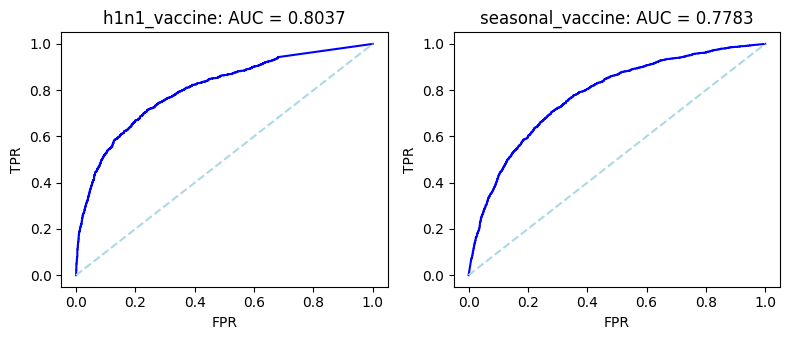

In [92]:
# Realizar la gráfica de la curva ROC
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

plot_roc(
    y_val['h1n1_vaccine'], 
    y_preds_knn['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)

plot_roc(
    y_val['seasonal_vaccine'], 
    y_preds_knn['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)

fig.tight_layout()
plt.show()

Esta gráfica se utiliza para evaluar la calidad de las predicciones de probabilidad de un modelo. Un modelo con un AUC más alto tendrá una curva ROC más cercana al rincón superior izquierdo, lo que indica una mejor separación entre las clases positivas y negativas.

En este caso, la curva ROC para la variable de salida `'h1n1_vaccine'` muestra un AUC de 0.8037, mientras que la curva ROC para la variable de salida `'seasonal_vaccine'` muestra un AUC de 0.7783. En general, el modelo KNN parece tener un rendimiento moderado en la predicción de probabilidades, con un AUC promedio de 0.7910.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
---
## **4. Stacking**
---
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
---
### **4.1. Búsqueda del mejor modelo**
---
---
---

</span>

Una vez realizado el proceso de kNN, pasamos a implementar el ensemble de Stacking.

El ensemble stacking es una técnica de aprendizaje automático en la que se combinan múltiples modelos (también llamados "base models" o "modelos base") para mejorar el rendimiento general de las predicciones. Este enfoque se basa en la idea de que diferentes modelos pueden capturar distintas perspectivas de los datos, y al combinar sus predicciones, es posible obtener un resultado más robusto y preciso.

Dicho esto, definimos dicho ensemble del siguiente modo:

In [46]:
# Extraer los mejores parámetros del kNN ajustado
best_params = knn_best.get_params()
knn_params = {k: v for k, v in best_params.items() if k in KNeighborsClassifier().get_params()}
knn_best_unfitted = KNeighborsClassifier(**knn_params)

# Configurar los estimadores del ensemble
estimators = [
    ('knn', knn_best_unfitted),  # Mejor versión del kNN
    ('tree', DecisionTreeClassifier(max_depth=7, random_state=42)),  # Árbol más profundo para mayor flexibilidad
    ('boost', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))  # Modelo de boosting ligero
]

# Configurar el modelo de Stacking
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(C=1.0, max_iter=1000, random_state=42),
    n_jobs=-1
)

# Envolver el modelo de Stacking en un MultiOutputClassifier
multi_output_stacking_model = MultiOutputClassifier(stacking_model)

# Opcional: Optimización de hiperparámetros
param_grid = {
    'estimator__final_estimator__C': [0.1, 1, 10],
    'estimator__tree__max_depth': [5, 7, 10],
    'estimator__boost__n_estimators': [100, 200],
    'estimator__boost__learning_rate': [0.05, 0.1]
}

# Crear un scorer personalizado con zero_division=1
f1_scorer = make_scorer(f1_score, average='samples', zero_division=1)

grid_stack = GridSearchCV(
    multi_output_stacking_model,
    param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1
)

En este caso, lo que hemos decidido hacer es implementar un ensemble stacking adaptado al problema multietiqueta, que consiste en predecir la probabilidad de que una persona haya recibido dos tipos de vacunas (contra el H1N1 y contra la gripe estacional). Después de varias pruebas con diferentes configuraciones de modelos y estrategias, este enfoque ha demostrado ser el más efectivo en términos de las métricas de evaluación seleccionadas, especialmente el F1-score promedio por muestra.

El diseño del ensemble incluye tres modelos base:  

1. **k-Nearest Neighbors (kNN):** Un algoritmo no paramétrico que clasifica las muestras basándose en su proximidad a otras muestras en el espacio de características. Este modelo captura relaciones locales en los datos y es especialmente útil en casos donde los patrones son altamente dependientes de la similitud entre individuos. 
 
2. **Árbol de decisión (Decision Tree):** Un modelo interpretable que segmenta el espacio de características en regiones basadas en reglas simples. Con una profundidad máxima limitada (`max_depth=7`), este modelo evita el sobreajuste y captura interacciones claras entre variables.

3. **Gradient Boosting:** Un enfoque de boosting que construye secuencialmente árboles de decisión pequeños, optimizando un objetivo específico. Este modelo es particularmente potente para identificar patrones no lineales y relaciones complejas entre las variables.

Para combinar las predicciones de estos modelos base, utilizamos una **regresión logística** como meta-modelo. La regresión logística es un modelo lineal que asigna pesos a las predicciones de los modelos base, permitiendo integrar sus salidas de manera eficiente sin introducir una complejidad excesiva. Este enfoque asegura que las contribuciones de cada modelo base sean adecuadas al problema y minimiza el riesgo de sobreajuste.

Dado que se trata de un problema multietiqueta, todo el modelo de stacking fue envuelto en un **MultiOutputClassifier**, lo que nos permitió tratar las dos etiquetas como salidas separadas pero relacionadas. Esta estrategia resultó ser clave para manejar las diferencias y posibles correlaciones entre las etiquetas.

Adicionalmente, realizamos una optimización de hiperparámetros utilizando `GridSearchCV`, ajustando parámetros críticos de los modelos base (como la profundidad del árbol, el número de estimadores en el boosting, y el parámetro de regularización de la regresión logística). Esto nos permitió afinar el rendimiento del ensemble y encontrar la configuración que maximizara el F1-score promedio por muestra.

En resumen, este ensemble stacking fue seleccionado después de evaluar múltiples métodos alternativos. Este enfoque se destacó por su capacidad para combinar la diversidad de los modelos base y generar predicciones finales que mejoraron consistentemente los resultados en nuestro conjunto de validación. Esto demuestra la ventaja de combinar diferentes enfoques para abordar problemas complejos como el presente.

Una vez comentado esto, pasamos a entrenar el modelo:

In [47]:
# Entrenar el modelo de Stacking
grid_stack.fit(X_train, y_train)

# Guardar el modelo
joblib.dump(grid_stack, "../../Algorithms/Prueba4.1/stacking_model.pkl")

# Mostramos los hipérparmetros seleccionados
print("Mejores hiperparámetros del ensemble stacking:", grid_stack.best_params_)

Mejores hiperparámetros del ensemble stacking: {'estimator__boost__learning_rate': 0.1, 'estimator__boost__n_estimators': 200, 'estimator__final_estimator__C': 1, 'estimator__tree__max_depth': 10}


Hemos obtenido los siguientes mejores hiperparámetros para el modelo de ensemble stacking:

- `estimator__boost__learning_rate`: 0.1
- `estimator__boost__n_estimators`: 200
- `estimator__final_estimator__C`: 1
- `estimator__tree__max_depth`: 10

Estos hiperparámetros indican las configuraciones óptimas para los componentes del modelo de stacking, sugiriendo que estas configuraciones proporcionan el mejor equilibrio entre sesgo y varianza, así como el mejor rendimiento general en el conjunto de validación.

El `learning_rate` de 0.1 y `n_estimators` de 200 para el `GradientBoostingClassifier` indican un enfoque conservador y robusto en la actualización de los pesos, permitiendo al modelo capturar patrones complejos sin sobreajustar. El parámetro `C` de 1 para la `LogisticRegression` como estimador final reduce la regularización, permitiendo una mayor flexibilidad para capturar las relaciones entre las predicciones de los estimadores base y las etiquetas verdaderas. Finalmente, el `max_depth` de 10 para el `DecisionTreeClassifier` proporciona un equilibrio adecuado entre la capacidad del modelo para capturar patrones complejos y la prevención del sobreajuste.

En conjunto, estos hiperparámetros sugieren que el modelo de ensemble stacking se beneficia de un enfoque equilibrado que combina la capacidad de capturar patrones complejos con la prevención del sobreajuste, proporcionando un rendimiento robusto y efectivo en el problema multietiqueta.

Ahora, una vez ajustado el modelo y encontrados los mejores hiperparámetros, mediante el siguiente gráfico podemos visualizar cómo evolucionan los valores promedio del F1-score durante la validación cruzada para las diferentes combinaciones de hiperparámetros evaluadas:

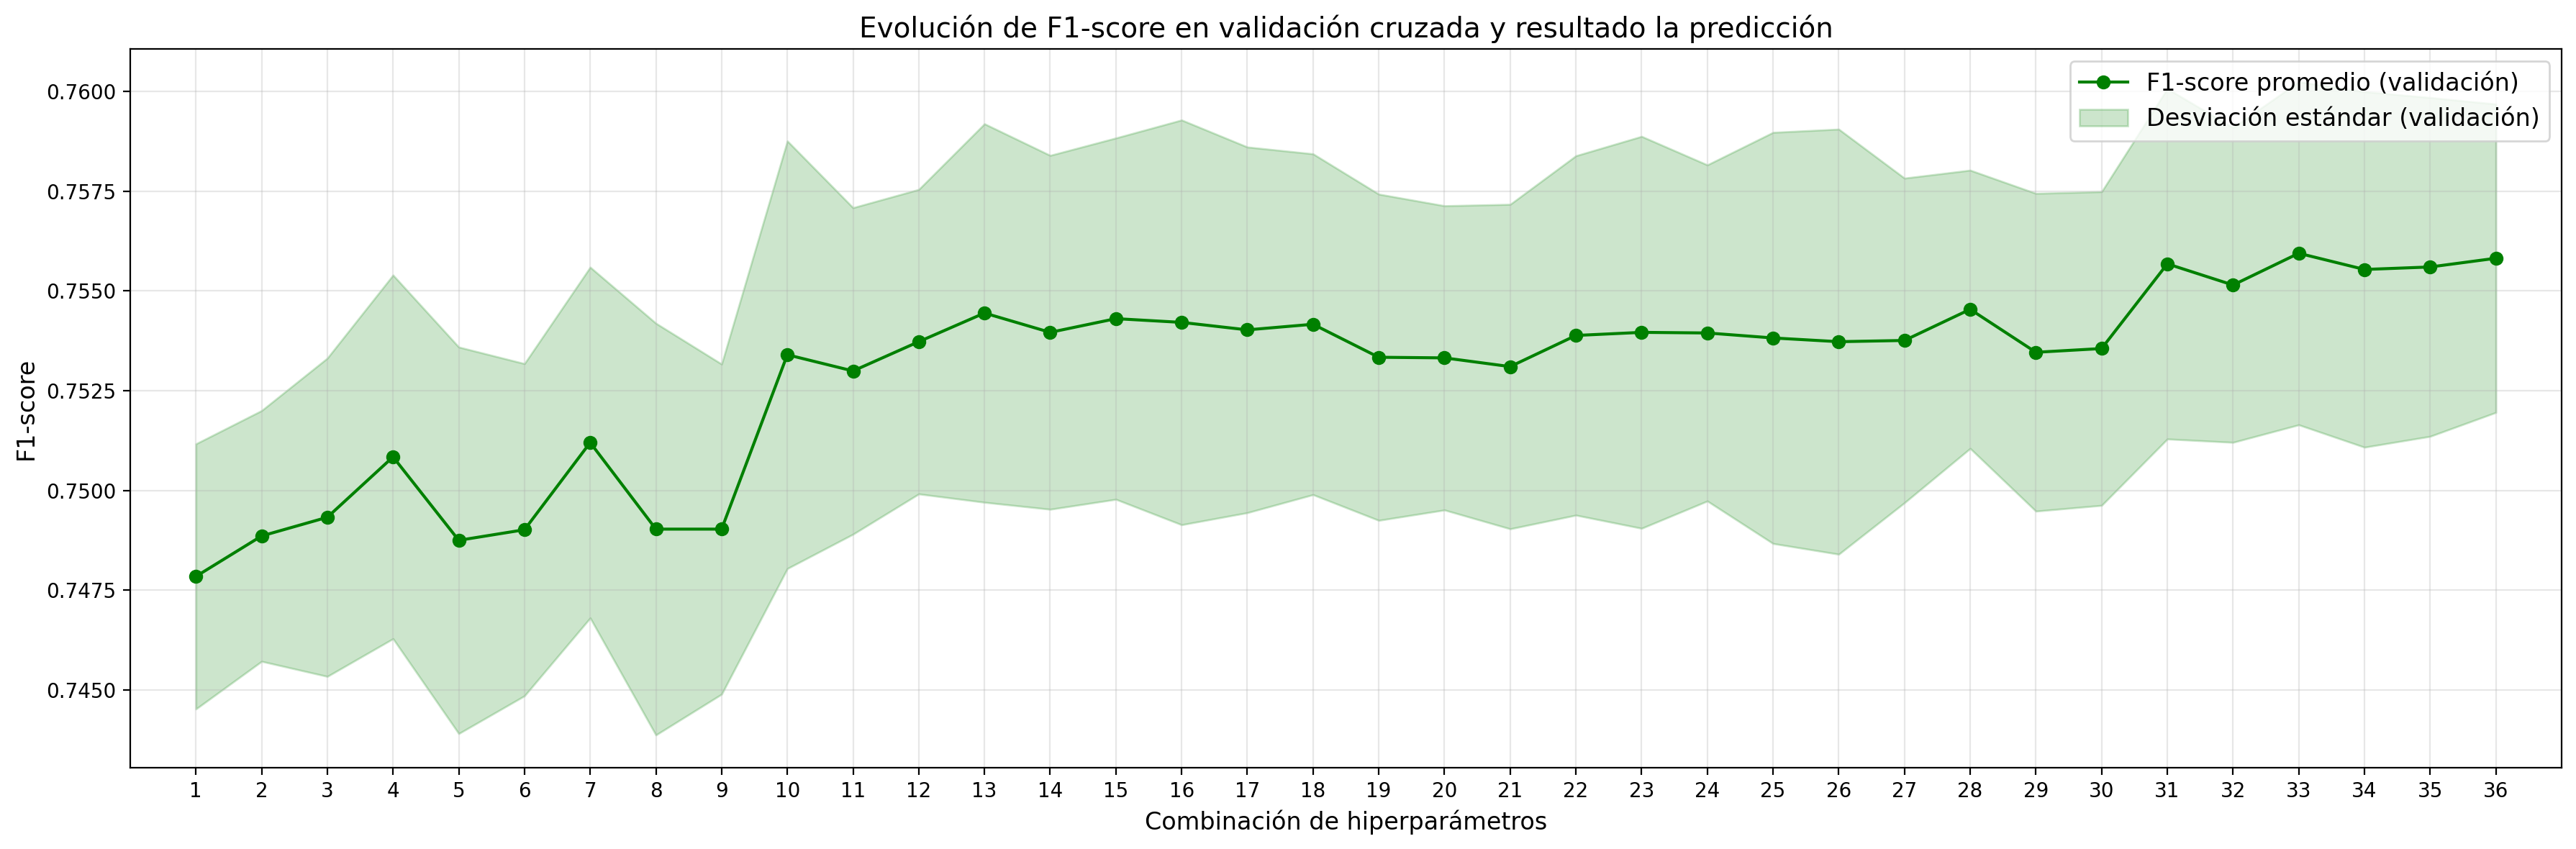

In [48]:
# Extraer los resultados de la validación cruzada
cv_results = grid_stack.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
param_combinations = range(1, len(mean_test_scores) + 1)  # Índices de combinaciones

# Crear el gráfico
plt.figure(figsize=(18, 6), dpi=200)
plt.plot(param_combinations, mean_test_scores, label='F1-score promedio (validación)', marker='o', color='green')
plt.fill_between(param_combinations, 
                 mean_test_scores - std_test_scores, 
                 mean_test_scores + std_test_scores, 
                 color='green', alpha=0.2, label='Desviación estándar (validación)')

# Personalización del gráfico
plt.title('Evolución de F1-score en validación cruzada y resultado la predicción', fontsize=14)
plt.xlabel('Combinación de hiperparámetros', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.xticks(param_combinations)
plt.xlim([0, len(param_combinations) + 1])
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La línea azul representa el F1-score promedio obtenido en las particiones de validación cruzada para cada configuración de hiperparámetros, mientras que la banda sombreada alrededor de la línea muestra la desviación estándar de los F1-scores, lo que indica la variabilidad del rendimiento del modelo entre las particiones.

Este gráfico permite identificar qué combinaciones de hiperparámetros proporcionaron el mejor rendimiento promedio y qué tan consistentes fueron los resultados. En definitiva, vemos un mejor rendimiento en el modelo de ensemble stacking en comparación con el modelo de kNN, lo que sugiere que el ensemble es capaz de capturar patrones más complejos y mejorar la generalización en el problema multietiqueta.

Podemos, de igual forma crear una tabla con los resultados obtenidos en la búsqueda de hiperparámetros para tener una visión más clara de los resultados obtenidos:

In [49]:
# Crear un DataFrame con las combinaciones de hiperparámetros y F1-score
results_df = pd.DataFrame(grid_stack.cv_results_)

# Seleccionar hiperparámetros utilizados y la métrica de interés
table = results_df[
    [
        'param_estimator__final_estimator__C',
        'param_estimator__tree__max_depth',
        'param_estimator__boost__n_estimators',
        'param_estimator__boost__learning_rate',
        'mean_test_score',
        'std_test_score'
    ]
]

# Renombrar columnas para mayor claridad
table.columns = [
    'Final Estimator C',
    'Tree Max Depth',
    'Boost N Estimators',
    'Boost Learning Rate',
    'Mean F1-Score',
    'Std F1-Score'
]

# Ordenar por el F1-score promedio
table = table.sort_values(by='Mean F1-Score', ascending=False)

# Opcional: Exportar la tabla a un archivo CSV
table.to_csv('../../Data/Tablas/Prueba4.1/stacking_hyperparameter_results.csv', index=False)

Así, ordenando estos resultados por el F1-score promedio, podemos ver que la mejor combinación de hiperparámetros coincide con la que hemos encontrado anteriormente y además, podemos ver otros resuldatos interesantes que nos pueden ayudar a entender cómo se comporta el modelo con diferentes configuraciones de hiperparámetros.

In [50]:
# Mostrar las primeras filas de la tabla
table.head(10)

,Final Estimator C,Tree Max Depth,Boost N Estimators,Boost Learning Rate,Mean F1-Score,Std F1-Score
32,1,10,200,0.1,0.755940,0.004299
35,10,10,200,0.1,0.755816,0.003863
30,1,5,200,0.1,0.755675,0.004389
34,10,7,200,0.1,0.755597,0.004244
33,10,5,200,0.1,0.755535,0.004455
31,1,7,200,0.1,0.755145,0.003943
27,0.1,5,200,0.1,0.754536,0.003486
12,1,5,200,0.05,0.754443,0.004742
14,1,10,200,0.05,0.754302,0.004527
15,10,5,200,0.05,0.754209,0.005071


$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
---
### **4.2. Evaluación con el mejor modelo**
---
---
---

</span>

$\ $

Al igual que anteriormente, vamos a emplear el modelo obtenido con los mejores hiperparámetros para evaluar su rendimiento en el conjunto de validación. Para ello, primero obtenemos el mejor modelo encontrado por `GridSearchCV` y lo guardamos en un archivo utilizando `joblib`. Esto nos permitirá reutilizar el modelo entrenado sin tener que volver a entrenarlo en el futuro.

In [51]:
# Obtener el mejor modelo
stack_best = grid_stack.best_estimator_

# Guardar el modelo entrenado
joblib.dump(stack_best, '../../Algorithms/Prueba4.1/stacking_best_model.pkl')

['../../Algorithms/Prueba4.1/stacking_best_model.pkl']

En el caso de que fuera necesario, dichos modelos (el entrenado y el mejor modelo) los podríamos cargar de la siguiente forma:

In [26]:
# Cargamos el modelo entrenado
grid_stack = joblib.load('../../Algorithms/Prueba4.1/stacking_model.pkl')

# Cargamos el mejor modelo
stack_best = joblib.load('../../Algorithms/Prueba4.1/stacking_best_model.pkl')

$\ $

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
---
#### **4.2.1. Predicción de las etiquetas de clase (predict)**
---
---

</span>

De forma similar a lo realizado con el modelo kNN, ahora vamos a evaluar el rendimiento del modelo de Stacking en el conjunto de validación. Para ello, predecimos las etiquetas de clase para cada muestra en el conjunto de validación utilizando el modelo de Stacking entrenado.

In [27]:
# Evaluar Stacking en el conjunto de validación
stacking_preds  = stack_best.predict(X_val)

Convertimos las predicciones en un DataFrame de pandas para poder visualizarlas de forma más cómoda, con los correspondientes nombres de las columnas dados por las respectivas etiquetas. Además, guardamos las predicciones en un archivo CSV, en caso de que queramos cargarlas en el futuro.

In [54]:
# Convertir las predicciones a un DataFrame de pandas
stacking_preds_df = pd.DataFrame(stacking_preds, columns=['h1n1_vaccine', 'seasonal_vaccine'], index=X_val_df.index)

# Guardar el DataFrame en un archivo CSV
stacking_preds_df.to_csv('../../Data/Algorithms/Prueba4.1/stacking_preds.csv', index=True)

# Mostrar los primeros registros de las predicciones
stacking_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0,0
1215,0,1
10540,0,0
7407,0,0
14697,0,0


Una vez hecho esto, podemos evaluar el rendimiento del modelo. Para ello, empleamos la métrica de evaluación `accuracy_score` de la librería `sklearn.metrics`, que nos permite calcular la precisión de las predicciones realizadas por el modelo y `classification_report` para obtener un informe más detallado de la precisión, recall, f1-score y support de las predicciones realizadas.

In [55]:
# Calcular y mostrar la exactitud
print("Accuracy en validación:", accuracy_score(y_val, stacking_preds), end="\n\n")

# Calcular y mostrar el F1-score
f1 = f1_score(y_val, stacking_preds, average='weighted', zero_division=0)
print("F1 Score (weighted):", f1)

# Calcular y mostrar la precisión
precision = precision_score(y_val, stacking_preds, average='weighted', zero_division=0)
print("Precision (weighted):", precision)

# Calcular y mostrar el recall
recall = recall_score(y_val, stacking_preds, average='weighted', zero_division=0)
print("Recall (weighted):", recall, end="\n\n")

# Calcular y mostrar el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_val, stacking_preds, zero_division=0))

Accuracy en validación: 0.6916885061774616

F1 Score (weighted): 0.7158316930709608
Precision (weighted): 0.7644899025405792
Recall (weighted): 0.678719293403257

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.73      0.52      0.60      1135
           1       0.78      0.75      0.77      2488

   micro avg       0.77      0.68      0.72      3623
   macro avg       0.75      0.63      0.69      3623
weighted avg       0.76      0.68      0.72      3623
 samples avg       0.35      0.34      0.34      3623



Los resultados obtenidos con el modelo de Stacking muestran una mejora en comparación con los obtenidos con el modelo KNN. El modelo de Stacking ha logrado una mayor precisión (accuracy) en la predicción de las variables de salida, lo que indica que la combinación de múltiples clasificadores ha sido beneficiosa para el rendimiento general del modelo.

El modelo de Stacking combina las predicciones de un `KNeighborsClassifier`, `DecisionTreeClassifier` y `GradientBoostingClassifier`, utilizando una `LogisticRegression` como clasificador final. Esta combinación permite que el modelo aproveche las fortalezas de cada clasificador base, lo que resulta en una mejor capacidad de generalización y una mayor precisión en las predicciones.

En comparación, el modelo KNN por sí solo obtuvo una precisión de 0.6932, lo que sugiere que tenía algunas dificultades para capturar la complejidad de los datos y hacer predicciones precisas. La mejora en la precisión con el modelo de Stacking (0.7645) indica que la estrategia de combinar múltiples clasificadores ha sido efectiva para abordar las limitaciones del modelo KNN individual.

Los resultados obtenidos con el modelo de stacking muestran un rendimiento general sólido, con una exactitud del 69.17% en el conjunto de validación. El F1 Score ponderado de 0.72 sugiere un buen equilibrio entre precisión y recall, mientras que la precisión ponderada de 0.76 indica que el modelo es efectivo en evitar falsos positivos. Sin embargo, el recall ponderado de 0.68 muestra que el modelo tiene margen para mejorar en la captura de verdaderos positivos.

El reporte de clasificación revela que el modelo maneja mejor la clase mayoritaria (clase 1) con una precisión y recall altos, mientras que la clase minoritaria (clase 0) tiene un recall más bajo, indicando dificultades para capturar todas las instancias de esta clase. Los promedios ponderados y macro reflejan un rendimiento equilibrado, aunque el recall más bajo sugiere la necesidad de técnicas adicionales para mejorar la captura de verdaderos positivos. En conjunto, el modelo de stacking es efectivo, pero podría beneficiarse de ajustes adicionales para mejorar su rendimiento en la clase minoritaria.

En resumen, el uso del modelo de Stacking ha resultado en un rendimiento superior en términos de precisión, lo que demuestra la ventaja de utilizar enfoques de ensamblado (ensemble) para mejorar la capacidad predictiva de los modelos de aprendizaje automático.

De igual forma, más en detalle, podemos ver el reporte de clasificación de forma individualizada para cada etiqueta:

In [56]:
# Calcular y mostrar el reporte de clasificación para cada etiqueta
print("Reporte de clasificación para h1n1_vaccine:\n", 
      classification_report(y_val['h1n1_vaccine'], stacking_preds[:, 0], zero_division=0))
print("Reporte de clasificación para seasonal_vaccine:\n", 
      classification_report(y_val['seasonal_vaccine'], stacking_preds[:, 1], zero_division=0))

Reporte de clasificación para h1n1_vaccine:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4207
           1       0.73      0.52      0.60      1135

    accuracy                           0.86      5342
   macro avg       0.80      0.73      0.76      5342
weighted avg       0.85      0.86      0.85      5342

Reporte de clasificación para seasonal_vaccine:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      2854
           1       0.78      0.75      0.77      2488

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



Donde vemos que en general obtenemos un mejor rendimiento para predecir las clases de la vacuna H1H1 que para la vacuna estacional. Obtenemos resultados similares a lo comentado anteriormente con el algoritmo kNN, pero con un rendimiento algo mejor en general.

Para acabar, podemos observar la matriz de confusión para tener una visión más clara de cómo se han clasificado las muestras para cada etiqueta:

Proporción de 1s en h1n1_vaccine: 1135
Proporción de 0s en h1n1_vaccine: 4207

Proporción de 1s en seasonal_vaccine: 2488
Proporción de 0s en seasonal_vaccine: 2854


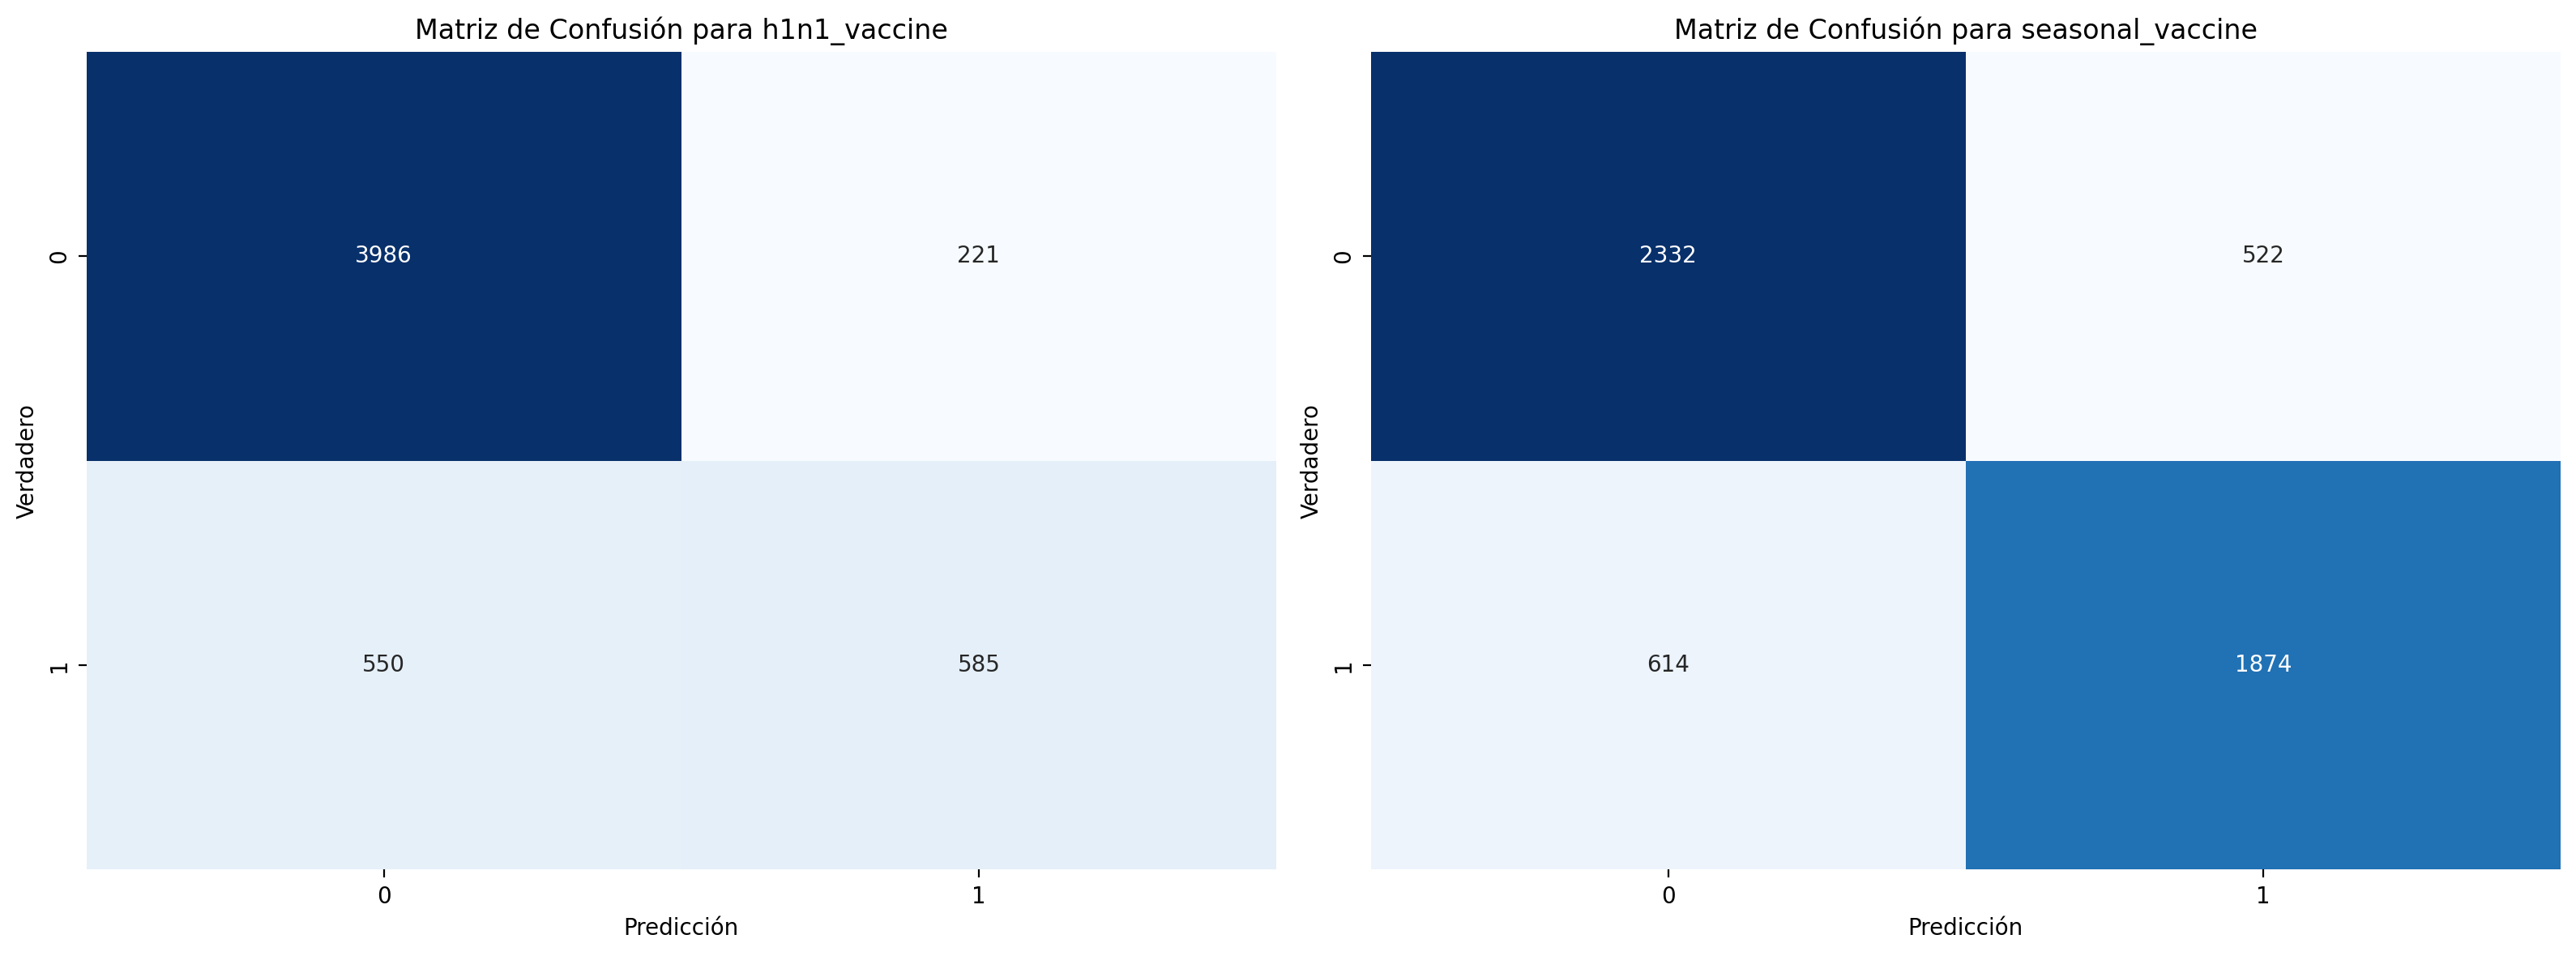

In [57]:
# Proporción de 1s y 0s en la variable objetivo h1n1_vaccine
print(f"Proporción de 1s en h1n1_vaccine: {y_val[y_val['h1n1_vaccine'] == 1].shape[0]}")
print(f"Proporción de 0s en h1n1_vaccine: {y_val[y_val['h1n1_vaccine'] == 0].shape[0]}", end="\n\n")

# Proporción de 1s y 0s en la variable objetivo seasonal_vaccine
print(f"Proporción de 1s en seasonal_vaccine: {y_val[y_val['seasonal_vaccine'] == 1].shape[0]}")
print(f"Proporción de 0s en seasonal_vaccine: {y_val[y_val['seasonal_vaccine'] == 0].shape[0]}")

# Calcular la matriz de confusión para h1n1_vaccine
conf_matrix_h1n1 = confusion_matrix(y_val['h1n1_vaccine'], stacking_preds[:, 0])

# Calcular la matriz de confusión para seasonal_vaccine
conf_matrix_seasonal = confusion_matrix(y_val['seasonal_vaccine'], stacking_preds[:, 1])

# Crear una figura con dos subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=200)

# Graficar la matriz de confusión para h1n1_vaccine
sns.heatmap(conf_matrix_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
ax[0].set_title('Matriz de Confusión para h1n1_vaccine')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Verdadero')

# Graficar la matriz de confusión para seasonal_vaccine
sns.heatmap(conf_matrix_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[1])
ax[1].set_title('Matriz de Confusión para seasonal_vaccine')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Verdadero')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Y ahora, pasamos a predecir las probabilidades de pertenencia a cada clase para cada muestra.

$\ $

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
---
#### **4.2.2. Predicción de pobabilidades de etiquetas (predict_proba)**
---
---

</span>

Pasamos ahora a evaluar el rendimiento del modelo de Stacking en términos de predicciones de probabilidad. Para ello, predecimos las probabilidades de pertenencia a cada clase para cada muestra en el conjunto de validación utilizando el modelo de Stacking entrenado.

In [28]:
# Evaluar KNN en el conjunto de validación
stacking_preds_proba = stack_best.predict_proba(X_val)

De igual forma, comprobamos la estructura de las matrices de probabilidades predichas por el modelo de Stacking para cada variable de salida.

In [59]:
print("stacking_preds_proba[0].shape", stacking_preds_proba[0].shape)
print("stacking_preds_proba[1].shape", stacking_preds_proba[1].shape)

stacking_preds_proba[0].shape (5342, 2)
stacking_preds_proba[1].shape (5342, 2)


Ahora, creamos un DataFrame de pandas que contenga las probabilidades predichas para cada una de las variables de salida (`'h1n1_vaccine'` y `'seasonal_vaccine'`), en este caso utilizando las probabilidades de la clase positiva (índice 1) para cada variable de salida y guardamos este DataFrame en un archivo CSV para poder analizar las probabilidades predichas posteriormente.

In [29]:
y_preds_stacking = pd.DataFrame(
    {
        "h1n1_vaccine": stacking_preds_proba[0][:, 1],
        "seasonal_vaccine": stacking_preds_proba[1][:, 1],
    },
    index = y_val.index
)

# Ver los primeros registros de las predicciones
print("y_preds_stacking.shape:", y_preds_stacking.shape)
y_preds_stacking.head(10)

# Guardar el DataFrame en un archivo CSV
y_preds_stacking.to_csv('../../Data/Algorithms/Prueba4.1/stacking_preds_proba.csv', index=True)

y_preds_stacking.shape: (5342, 2)


Mostramos ahora las primeras filas del DataFrame de probabilidades predichas:

In [85]:
y_preds_stacking.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.052806,0.327814
1215,0.368125,0.830775
10540,0.067200,0.084816
7407,0.141366,0.196748
14697,0.103888,0.239085


Y volvemos a calcular el AUC para cada variable de salida y luego calculamos la media de los dos AUC para obtener una medida general del rendimiento del modelo. Además, calculamos otras métricas adicionales, como las empleadas anteriormente, para evaluar el rendimiento del modelo.

In [94]:
# Calcular el AUROC para cada variable de salida
roc_auc_h1n1 = roc_auc_score(y_val['h1n1_vaccine'], stacking_preds_proba[0][:, 1])
roc_auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], stacking_preds_proba[1][:, 1])

# Calcular el AUROC promedio
roc_auc_promedio = roc_auc_score(y_val, y_preds_stacking)

# Imprimir los AUROC
print(f"AUROC para H1N1: {roc_auc_h1n1}")
print(f"AUROC para vacuna estacional: {roc_auc_seasonal}")
print(f"AUROC promedio: {roc_auc_promedio}")

AUROC para H1N1: 0.8730908942406667
AUROC para vacuna estacional: 0.8623014858144602
AUROC promedio: 0.8676961900275635


Donde vemos que el modelo de Stacking ha logrado un AUC promedio de 0.87, lo que indica un rendimiento sólido en la predicción de probabilidades. La curva ROC para la variable de salida `'h1n1_vaccine'` muestra un AUC de 0.87, mientras que la curva ROC para la variable de salida `'seasonal_vaccine'` muestra un AUC de 0.86. En general, el modelo de Stacking parece tener un rendimiento sólido en la predicción de probabilidades, con un AUC promedio de 0.87, como ya hemos mencionado.

El significado de este valor es que el modelo tiene una probabilidad del 87% de clasificar correctamente una observación aleatoria positiva más alta que una observación aleatoria negativa. Este valor es una métrica que mide la capacidad de un modelo para distinguir entre clases. En este contexto, un AUROC de 0.87 significa que el modelo tiene una probabilidad del 85% de clasificar correctamente una observación aleatoria positiva más alta que una observación aleatoria negativa.

Más específicamente un AUROC de 0.87 indica que, si seleccionamos aleatoriamente una observación positiva y una negativa, el modelo asignará una puntuación de probabilidad más alta a la observación positiva el 85% de las veces. En otras palabras, el modelo es bastante bueno para distinguir entre observaciones positivas y negativas, aunque no es perfecto (un AUROC de 1.0 sería perfecto, mientras que un AUROC de 0.5 indica un rendimiento no mejor que el azar).

En el caso anterior, con el modelo KNN, el AUC promedio fue de 0.79, lo que indica que el modelo de Stacking ha logrado una mejora significativa en la capacidad de distinguir entre clases y hacer predicciones precisas.

Una vez comentado esto, volvemos a graficar estos resultados para poder visualizarlos de forma más clara. Para ello, empleamos la función `plot_roc` que nos permite visualizar la curva ROC para cada variable de salida.

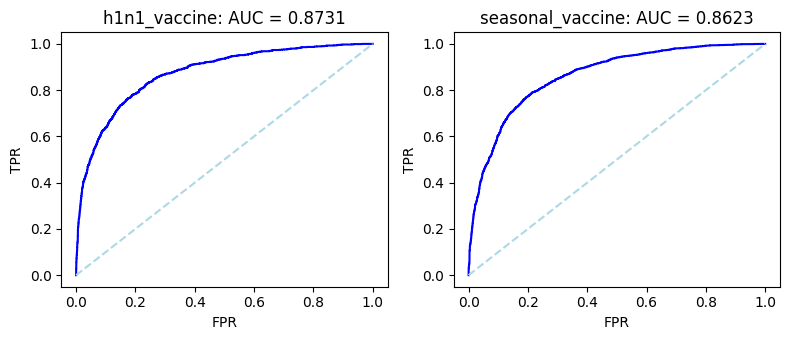

In [87]:
# Realizar la gráfica de la curva ROC
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

plot_roc(
    y_val['h1n1_vaccine'], 
    y_preds_stacking['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)

plot_roc(
    y_val['seasonal_vaccine'], 
    y_preds_stacking['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)

fig.tight_layout()
plt.show()

Vemos que al tener un AUC promedio de 0.8677, el modelo de Stacking ha logrado un rendimiento bastante bueno en la predicción de probabilidades, con una curva ROC que se acerca algo más al rincón superior izquierdo, lo que indica una mejor separación entre las clases positivas y negativas.

Por clases, la curva ROC para la variable de salida `'h1n1_vaccine'` muestra un AUC de 0.8731, mientras que la curva ROC para la variable de salida `'seasonal_vaccine'` muestra un AUC de 0.8623, lo que refleja un mejor rendimiento en la predicción de las dos vacunas y principalmente en la vacuna estacional.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
---
## **5. Predicción**
---
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
---
### **5.1. Lectura del documento con el formato de envío**
---
---
---

</span>

Finalmente, pasamos a realizar las predicciones finales sobre el conjunto de test. Dichos datos de test ya los hemos cargado previamente, además de también haberlos  normalizado los mismos valores de normalización que los datos de entrenamiento.

Lo que hacemos ahora es cargar el documento con el formato de envío (`submission_format.csv`) para verificar que las predicciones se realizan correctamente y se guardan en el formato adecuado para poder enviarlas a la competición.

Dicho esto, procedemos a cargar el documento con el formato de envío y visualizar las primeras filas para comprobar que se ha cargado correctamente:

In [30]:
# Cargar el documento con el formato de la competencia
submission_df = pd.read_csv("../../Data/Original/submission_format.csv", index_col="respondent_id")

# Mostar los primeros registros del documento
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


Ahora, modificamos los índices del dataframe con los datos de test que ya habíamos normalizado previamente, para que coincidan con los índices del documento con el formato de envío, ya que tras el preporcesamiento común, los índices de los datos de test se habían reiniado, comenzando desde 0. Para ello, empleamos el método `set_index` de pandas.

Una vez hecho esto, podemos comprobar que los índices de los datos de test coinciden con los índices del documento con el formato de envío:

In [31]:
# Asegurarse de que X_test_df tenga los mismos índices que submission_df
X_test_df.index = submission_df.index

# Make sure we have the rows in the same order
np.testing.assert_array_equal(X_test_df.index.values, submission_df.index.values)

# Estrucutra de submission_df
print("Dimensiones del archivo de entrega:", submission_df.shape)

Dimensiones del archivo de entrega: (26708, 2)


Mostrar las primeras filas de los datos de test con los índices modificados:

In [23]:
X_test_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,0.50,0.666667,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26708,0.25,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26709,0.50,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26710,0.25,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26711,0.75,0.333333,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Esto aunque en realidad no es realmente necesario, ya que para obtener las predicciones vamos a emplear la variable `X_test` que contiene los datos de test normalizados, creada anteriormente a partir del array `X_test_scaled`, puede ser de utilidad si queremos visualizar los datos de test para realizar alguna comprobación.

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
---
### **5.2. kNN**
---
---
---

</span>

$\ $

<span style="color:#9a99e2">

---
---
#### **5.2.1. Predicción de las etiquetas de clase (predict)**
---
---

</span>

Ahora sí, pasamos a realizar las predicciones finales sobre el conjunto de test utilizando el modelo kNN. Para ello, empleamos el método `predict` del modelo kNN entrenado (`knn_best`) para predecir las etiquetas de clase para cada muestra en el conjunto de test.

In [32]:
# Evaluar KNN en el conjunto de validación
knn_test_preds = knn_best.predict(X_test)

Guardamos los resultados obtenidos en un DataFrame de pandas para poder visualizarlos de forma más cómoda, con los correspondientes nombres de las columnas dados por las respectivas etiquetas. Además, guardamos las predicciones en un archivo CSV, en caso de que queramos cargarlas en el futuro y las visualizamos para comprobar que se han realizado correctamente.

In [65]:
# Convertir las predicciones a un DataFrame de pandas
knn_test_preds_df = pd.DataFrame(knn_test_preds, columns=['h1n1_vaccine', 'seasonal_vaccine'], index=X_test_df.index)

# Guardar el DataFrame en un archivo CSV
knn_test_preds_df.to_csv('../../Data/Algorithms/Prueba4.1/knn_test_preds.csv', index=True)

# Mostrar los primeros registros de las predicciones
knn_test_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0,1
26708,0,0
26709,0,0
26710,1,1
26711,0,0


Dado que no disponemos de las etiquetas reales de los datos de test, no podemos evaluar el rendimiento del modelo kNN en este conjunto de datos. Sin embargo, podemos enviar las predicciones de las probabilidades calculadas con la función `predict_proba` a la competición para obtener una puntuación de evaluación. Para ello, pasaríamos a la siguiente sección.

$\ $

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
---
#### **5.2.2. Predicción de pobabilidades de etiquetas (predict_proba)**
---
---

</span>

Pasamos pues a predecir las probabilidades de pertenencia a cada clase para cada muestra en el conjunto de test utilizando el modelo kNN entrenado.

In [33]:
# Evaluar KNN en el conjunto de validación
knn_test_preds_proba = knn_best.predict_proba(X_test)

Comprobamos la estructura de las matrices de probabilidades predichas por el modelo kNN para cada variable de salida.

In [67]:
# Estrutura de las predicciones
print("knn_test_preds_proba[0].shape", knn_test_preds_proba[0].shape)
print("knn_test_preds_proba[1].shape", knn_test_preds_proba[1].shape)

knn_test_preds_proba[0].shape (26708, 2)
knn_test_preds_proba[1].shape (26708, 2)


Y creamos un DataFrame de pandas que contenga las probabilidades predichas para cada una de las variables de salida (`'h1n1_vaccine'` y `'seasonal_vaccine'`), en este caso utilizando las probabilidades de la clase positiva (índice 1) para cada variable de salida y guardamos este DataFrame en un archivo CSV para poder enviar las predicciones a la competición. Dicho DataFrame sigue el formato del documento con el formato de envío, con las columnas `h1n1_vaccine` y `seasonal_vaccine` y los respectivos índices de las muestras.

In [35]:
# Crear una copia de submission_df para knn
submission_df_knn = submission_df.copy()

# Guardar las predicciones en el DataFrame de la competencia
submission_df_knn["h1n1_vaccine"] = knn_test_preds_proba[0][:, 1]
submission_df_knn["seasonal_vaccine"] = knn_test_preds_proba[1][:, 1]

# Mostar los primeros registros del DataFrame
submission_df_knn.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.083824,0.543200
26708,0.091159,0.360170
26709,0.000000,0.395527
26710,0.732223,0.644614
26711,0.225263,0.409081


Guardamos las predicciones en un archivo CSV para poder enviarlas a la competición.

In [69]:
# Guardar submission_df_stacking como un archivo CSV
submission_df_knn.to_csv('../../Data/Submission/Prueba4.1/submission_knn.csv', index=True)

$\ $

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
---
#### **5.2.3. Submission**
---
---

</span>

Finalmente, proporcionamos esta submission a la comptetencia de DrivenData para comprobar la eficacia de nuestro modelo con los valores obtenidos con `predic_proba`. Así, obtenemos:

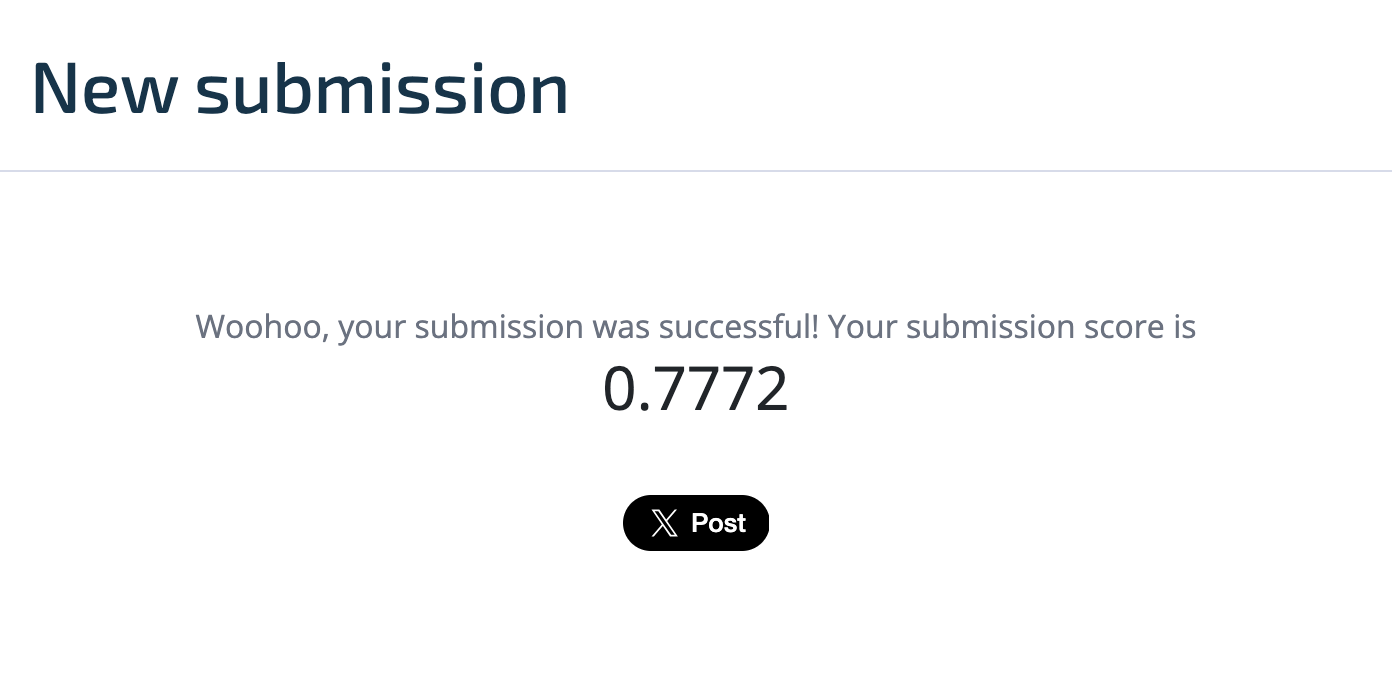

In [138]:
# Mostrar la imagen
display(Image(filename="../../Data/Submission/Prueba4.1/puntuacion_knn.png", width=550))

Una puntación de 0.7772 indica que el modelo ha logrado un rendimiento moderado en la competición, con un AUC promedio de 0.7772. Teniendo en cuenta que se ha empleado un modelo kNN, que es un algoritmo relativamente simple, el rendimiento obtenido es razonable. Sin embargo, es posible que se puedan obtener mejores resultados con modelos más complejos o con enfoques de ensamblado más avanzados, como por ejemplo, el modelo de Stacking que se ha implementado anteriormente.

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
---
### **5.3. Stacking**
---
---
---

</span>

$\ $

<span style="color:#9a99e2">

---
---
#### **5.3.1. Predicción de las etiquetas de clase (predict)**
---
---

</span>

Pasamos ahora a realizar las predicciones finales sobre el conjunto de test utilizando el modelo de Stacking. Para ello, empleamos el método `predict` del modelo de Stacking entrenado (`stack_best`) para predecir las etiquetas de clase para cada muestra en el conjunto de test.

In [34]:
# Evaluar Stacking en el conjunto de validación
stacking_test_preds = stack_best.predict(X_test)

Y guardamos los resultados obtenidos en un DataFrame de pandas para poder visualizarlos de forma más cómoda, con los correspondientes nombres de las columnas dados por las respectivas etiquetas. Además, guardamos las predicciones en un archivo CSV, en caso de que queramos cargarlas en el futuro y las visualizamos para comprobar que se han realizado correctamente.

In [36]:
# Convertir las predicciones a un DataFrame de pandas
stacking_test_preds_df = pd.DataFrame(stacking_test_preds, columns=['h1n1_vaccine', 'seasonal_vaccine'], index=X_test_df.index)

# Guardar el DataFrame en un archivo CSV
stacking_test_preds_df.to_csv('../../Data/Algorithms/Prueba4.1/stacking_test_preds.csv', index=False)

# Mostrar los primeros registros de las predicciones
stacking_test_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0,0
26708,0,0
26709,0,1
26710,1,1
26711,0,1


$\ $

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
---
#### **5.3.2. Predicción de pobabilidades de etiquetas (predict_proba)**
---
---

</span>

Ahora, pasamos a predecir las probabilidades de pertenencia a cada clase para cada muestra en el conjunto de test utilizando el modelo de Stacking entrenado.

In [37]:
# Evaluar KNN en el conjunto de validación
stacking_test_preds_proba = stack_best.predict_proba(X_test)

Mostramos la estructura de las matrices de probabilidades predichas por el modelo de Stacking para cada variable de salida.

In [73]:
# Estrutura de las predicciones
print("stacking_preds_proba[0].shape", stacking_test_preds_proba[0].shape)
print("stacking_preds_proba[1].shape", stacking_test_preds_proba[1].shape)

stacking_preds_proba[0].shape (26708, 2)
stacking_preds_proba[1].shape (26708, 2)


Creamos un DataFrame de pandas que contenga las probabilidades predichas para cada una de las variables de salida (`'h1n1_vaccine'` y `'seasonal_vaccine'`), en este caso utilizando las probabilidades de la clase positiva (índice 1) para cada variable de salida y guardamos este DataFrame en un archivo CSV para poder enviar las predicciones a la competición. Dicho DataFrame sigue el formato del documento con el formato de envío, con las columnas `h1n1_vaccine` y `seasonal_vaccine` y los respectivos índices de las muestras.

In [38]:
# Crear una copia de submission_df para stacking
submission_df_stacking = submission_df.copy()

# Guardar las predicciones en el DataFrame de la competencia
submission_df_stacking["h1n1_vaccine"] = stacking_test_preds_proba[0][:, 1]
submission_df_stacking["seasonal_vaccine"] = stacking_test_preds_proba[1][:, 1]

# Mostar los primeros registros del DataFrame
submission_df_stacking.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.099733,0.273661
26708,0.062585,0.086467
26709,0.111338,0.752619
26710,0.762210,0.887535
26711,0.196246,0.500750


Y guardamos las predicciones en un archivo CSV para poder enviarlas a la competición.

In [75]:
# Guardar submission_df_stacking como un archivo CSV
submission_df_stacking.to_csv('../../Data/Submission/Prueba4.1/submission_stacking.csv', index=True)

$\ $

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
---
#### **5.3.3. Submission**
---
---

</span>

Finalmente, proporcionamos esta submission a la comptetencia de DrivenData para comprobar la eficacia de nuestro modelo con los valores obtenidos con `predic_proba`. Así, obtenemos:

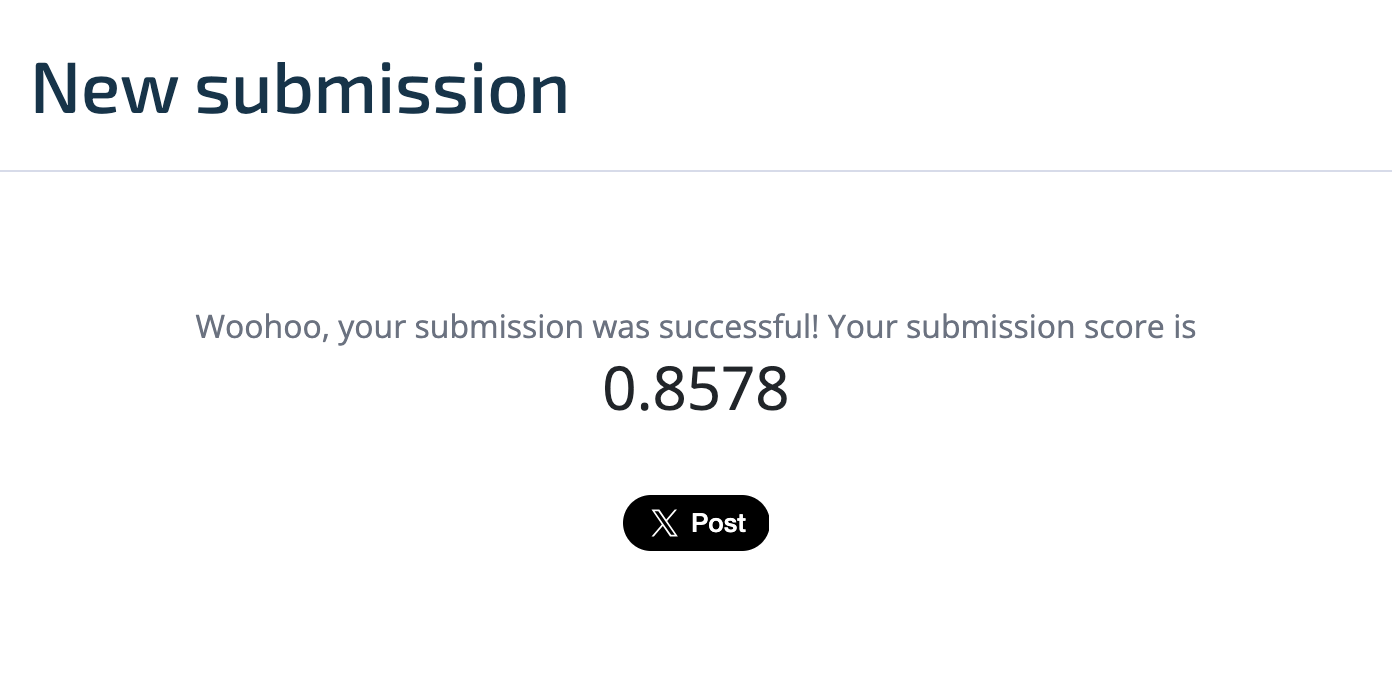

In [137]:
# Mostrar la imagen
display(Image(filename="../../Data/Submission/Prueba4.1/puntuacion_stacking.png", width=550))

En este caso, hemos obtenido una puntuación de 0.8578, lo que indica que el modelo de Stacking ha logrado un rendimiento bastante bueno en la competición, con un AUC promedio de 0.8578. Este resultado es superior al obtenido con el modelo kNN, lo que sugiere que la combinación de múltiples clasificadores en un ensemble de Stacking ha sido efectiva para mejorar la capacidad predictiva del modelo.

Finalmente comentar que en la competición de DrivenData, los valores más altos calculados con esta métrica se encuentran etorno a 0.8578, por lo que un valor de 0.84 es bastante bueno, aunque evidentemente siempre se puede mejorar, dependiendo del modelo y de las técnicas empleadas.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
---
## **6. Comentarios finales**
---
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
---
### **6.1. Evolución del F1-score en la validación cruzada de cada modelo**
---
---
---

</span>

Finalmente, para acabar, una vez realizado todo el proceso de análisis, preprocesamiento, modelado y evaluación, podemos concluir que el modelo de Stacking ha logrado un rendimiento superior al modelo kNN en la competición de DrivenData. El modelo de Stacking ha obtenido una puntuación (AUC promedio) de 0.8578, lo que indica que ha logrado un rendimiento bastante bueno en la competición. Este resultado es superior al obtenido con el modelo kNN (AUC = 0.7772), lo que sugiere que la combinación de múltiples clasificadores en un ensemble de Stacking ha sido efectiva para mejorar la capacidad predictiva del modelo.

Evidentemente, esto se podría mejorar con la implementación de otros modelos más complejos o con enfoques de ensamblado más avanzados. Sin embargo, en este caso, el modelo de Stacking ha logrado un rendimiento bastante bueno, lo que sugiere que es una estrategia efectiva para abordar problemas complejos como el presente.

Así, de una forma más visual, podemos comparar los resultados obtenidos en el proceso de entrenamiento y selección de hiperparámetros de los modelos kNN y Stacking de forma gráfica:

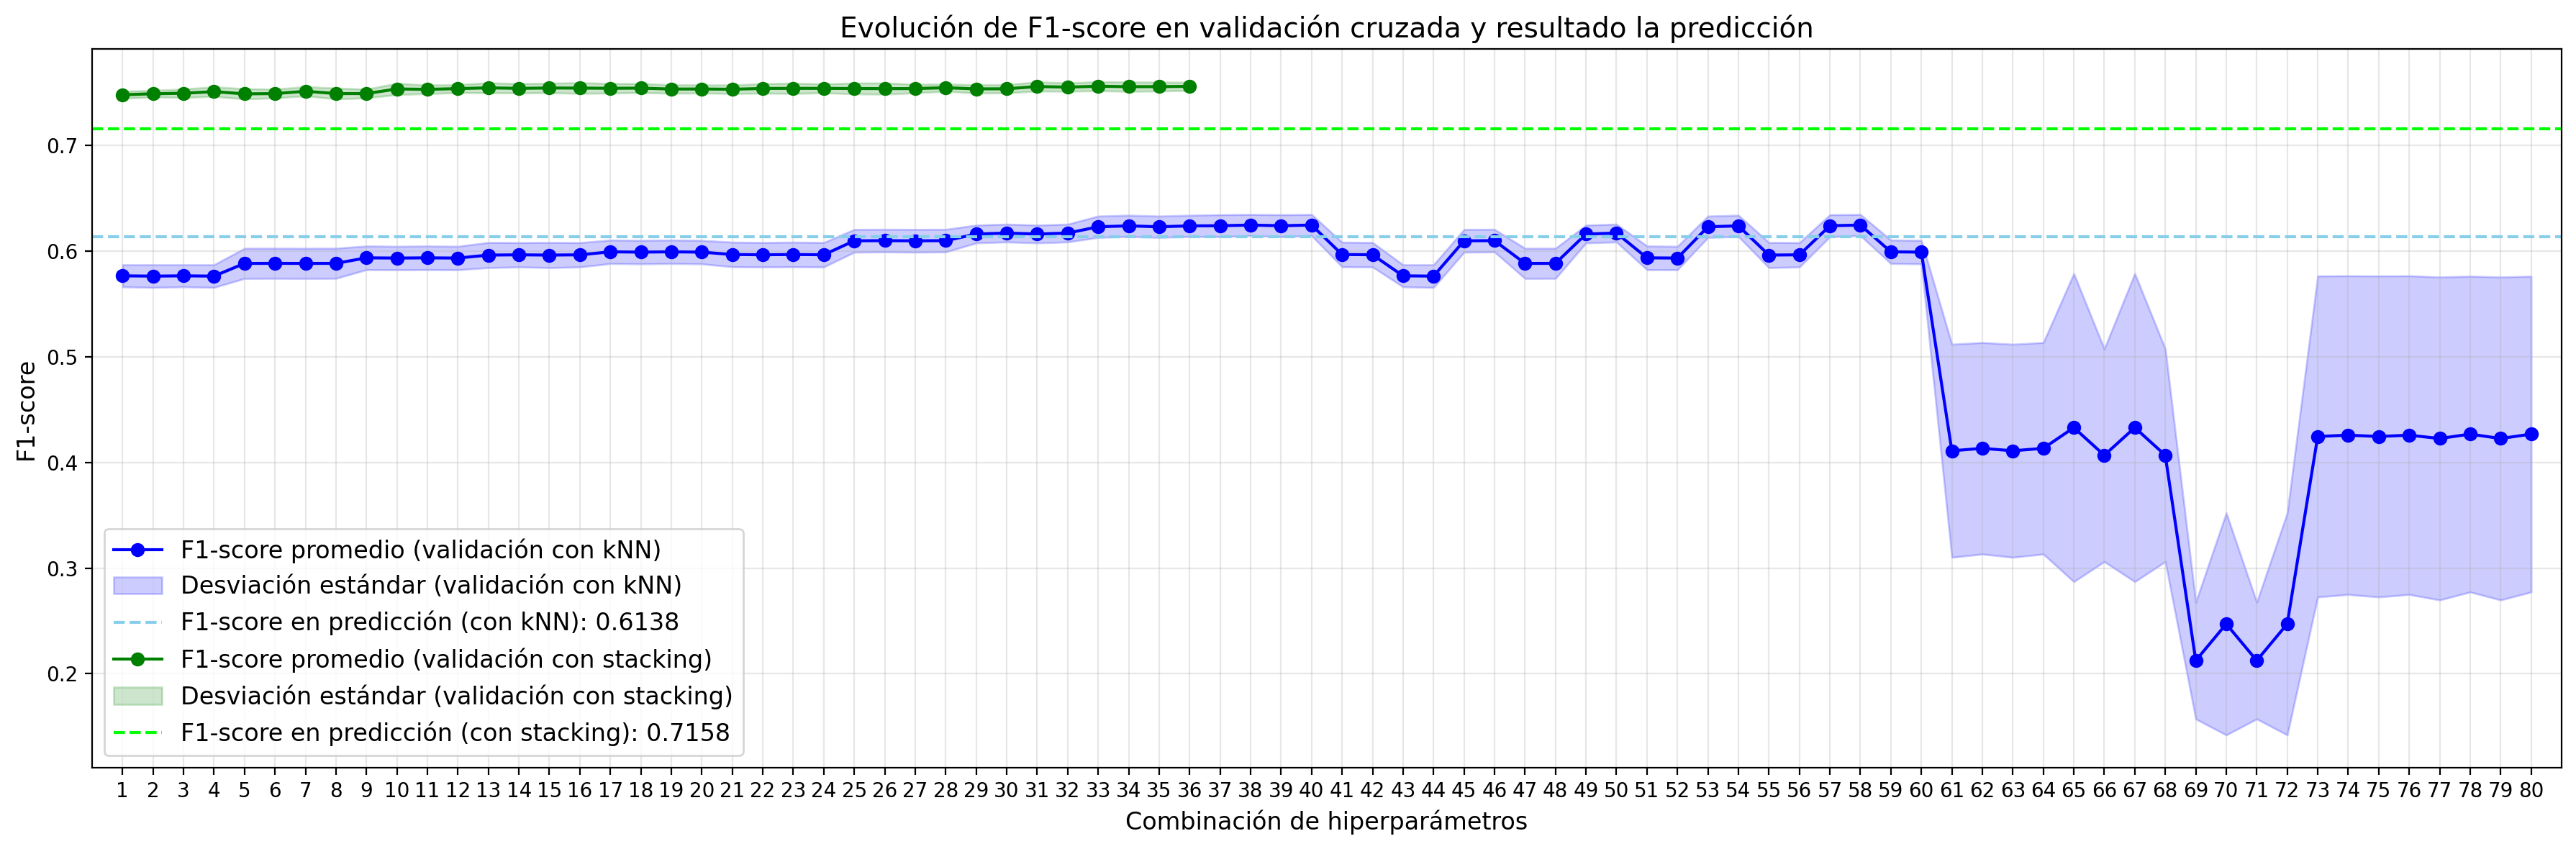

In [42]:
# Crear el gráfico
plt.figure(figsize=(18, 6), dpi=200)

# Extraer los resultados de la validación cruzada de kNN
cv_results = grid_knn.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
param_combinations_knn = range(1, len(mean_test_scores) + 1)

# Calcular el F1-score en el conjunto de prueba
f1 = f1_score(y_val, knn_preds, average='weighted', zero_division=0)

# Gráfico para kNN
plt.plot(param_combinations_knn, mean_test_scores, label='F1-score promedio (validación con kNN)', marker='o', color='blue')
plt.fill_between(param_combinations_knn, 
                 mean_test_scores - std_test_scores, 
                 mean_test_scores + std_test_scores, 
                 color='blue', alpha=0.2, label='Desviación estándar (validación con kNN)')
plt.axhline(y=f1, color='skyblue', linestyle='--', label=f'F1-score en predicción (con kNN): {f1:.4f}')

# Extraer los resultados de la validación cruzada de kNN
cv_results = grid_stack.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
param_combinations_stack = range(1, len(mean_test_scores) + 1)

# Calcular el F1-score en el conjunto de prueba
f1 = f1_score(y_val, stacking_preds, average='weighted', zero_division=0)

# Gráfico para Stacking
plt.plot(param_combinations_stack, mean_test_scores, label='F1-score promedio (validación con stacking)', marker='o', color='green')
plt.fill_between(param_combinations_stack,
                mean_test_scores - std_test_scores,
                mean_test_scores + std_test_scores,
                color='green', alpha=0.2, label='Desviación estándar (validación con stacking)')
plt.axhline(y=f1, color='lime', linestyle='--', label=f'F1-score en predicción (con stacking): {f1:.4f}')

# Personalización del gráfico
plt.title('Evolución de F1-score en validación cruzada y resultado la predicción', fontsize=14)
plt.xlabel('Combinación de hiperparámetros', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.xticks(param_combinations_knn)
plt.xlim([0, len(param_combinations_knn) + 1])
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La línea azul (kNN) y la línea verde (Stacking) representa el F1-score promedio obtenido en las particiones de validación cruzada para cada configuración de hiperparámetros, mientras que la banda sombreada alrededor de la línea muestra la desviación estándar de los F1-scores, lo que indica la variabilidad del rendimiento del modelo entre las particiones.

Además, hemos incluido una línea punteada verde que representa el F1-score promedio obtenido por el modelo de Stacking en el proceso de validación. Esta línea se aproxima, como podemos ver, a los resultados obtenidos en la validación cruzada, lo que sugiere que el modelo ha logrado generalizar bien en el conjunto de validación. En comparación, el modelo kNN ha obtenido un rendimiento inferior en la validación cruzada, lo que sugiere que ha tenido dificultades para generalizar en el conjunto de validación. Del mismo modo, también incluimos una línea punteada azul que representa el F1-score promedio obtenido por el modelo kNN en el proceso de validación.

Este gráfico permite identificar qué combinaciones de hiperparámetros proporcionaron el mejor rendimiento promedio y qué tan consistentes fueron los resultados. En definitiva, vemos un mejor rendimiento en el modelo de ensemble Stacking en comparación con el modelo de kNN, lo que sugiere que el ensemble es capaz de capturar patrones más complejos y mejorar la generalización en el problema multietiqueta. 

En resumen, el modelo de Stacking ha logrado un rendimiento superior al modelo kNN en la competición de DrivenData, lo que sugiere que la combinación de múltiples clasificadores en un ensemble de Stacking ha sido efectiva para mejorar la capacidad predictiva del modelo. Este resultado destaca la importancia de explorar enfoques de ensamblado para abordar problemas complejos y mejorar la precisión de las predicciones en problemas multietiqueta.

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
---
### **6.2. Curvas ROC y AUC para cada modelo en entrenamiento, validación y test**
---
---
---

</span>

Por último, podemos visualizar las curvas ROC y los valores de AUC para cada modelo en entrenamiento, validación y test. Para ello, empleamos la función `plot_roc` que nos permite visualizar la curva ROC para cada variable de salida.

Lo primero que vamos a hacer es realizar una predicción con los propios valores de entrenamiento, mismos valores con los cuales hemos entrenado los propios modelos. Esto lo haremos, simplemente para tener una referencia de cómo se comportan los modelos con los datos con los que han sido entrenados y así poder compararlo con los resultados obtenidos en validación y test.

Así, vamos a realizar dichas predicciones para los datos de entrenamiento con los modelos previamente entrenados:

In [43]:
# Calcular las predicciones de los modelos en el conjunto de entrenamiento
knn_preds_proba_train = knn_best.predict_proba(X_train)
stacking_preds_proba_train = stack_best.predict_proba(X_train)

Y ahora, guardamos las predicciones en un archivo CSV para poder analizarlas posteriormente:

In [44]:
# Crear un DataFrame con las predicciones de probabilidad para kNN en entrenamiento
y_preds_knn_train = pd.DataFrame(
    {
        "h1n1_vaccine": knn_preds_proba_train[0][:, 1],
        "seasonal_vaccine": knn_preds_proba_train[1][:, 1],
    },
    index=y_train.index
)

# Crear un DataFrame con las predicciones de probabilidad para Stacking en entrenamiento
y_preds_stacking_train = pd.DataFrame(
    {
        "h1n1_vaccine": stacking_preds_proba_train[0][:, 1],
        "seasonal_vaccine": stacking_preds_proba_train[1][:, 1],
    },
    index=y_train.index
)

# Guardar los DataFrames en archivos CSV
y_preds_knn_train.to_csv('../../Data/Algorithms/Prueba4.1/knn_train_preds_proba.csv', index=True)
y_preds_stacking_train.to_csv('../../Data/Algorithms/Prueba4.1/stacking_train_preds_proba.csv', index=True)

Una vez hecho esto, mostramos las primeras filas del DataFrame de probabilidades predichas para los datos de entrenamiento. Comenzamos mostrando las primeras filas de las predicciones realizadas con el modelo kNN:

In [45]:
# Mostar los primeros registros de las predicciones de kNN
y_preds_knn_train.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
12230,0.0,1.0
8871,0.0,1.0
2390,0.0,1.0
9227,0.0,0.0
9064,0.0,0.0


Ahora, mostramos las primeras filas de las predicciones realizadas con el modelo de Stacking:

In [46]:
# Mostar los primeros registros de las predicciones de Stacking
y_preds_stacking_train.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
12230,0.097978,0.784730
8871,0.193709,0.560859
2390,0.055639,0.764475
9227,0.063041,0.102043
9064,0.065484,0.234074


Finalmente, pasamos a visualizar las curvas ROC y los valores de AUC para cada modelo en entrenamiento, validación y test. Para ello, empleamos la función `plot_roc` que nos permite visualizar la curva ROC para cada variable de salida. Además de esto, visualizamos también, mediante un gráfico de barras, los valores de AUC para cada modelo en entrenamiento, validación y test.

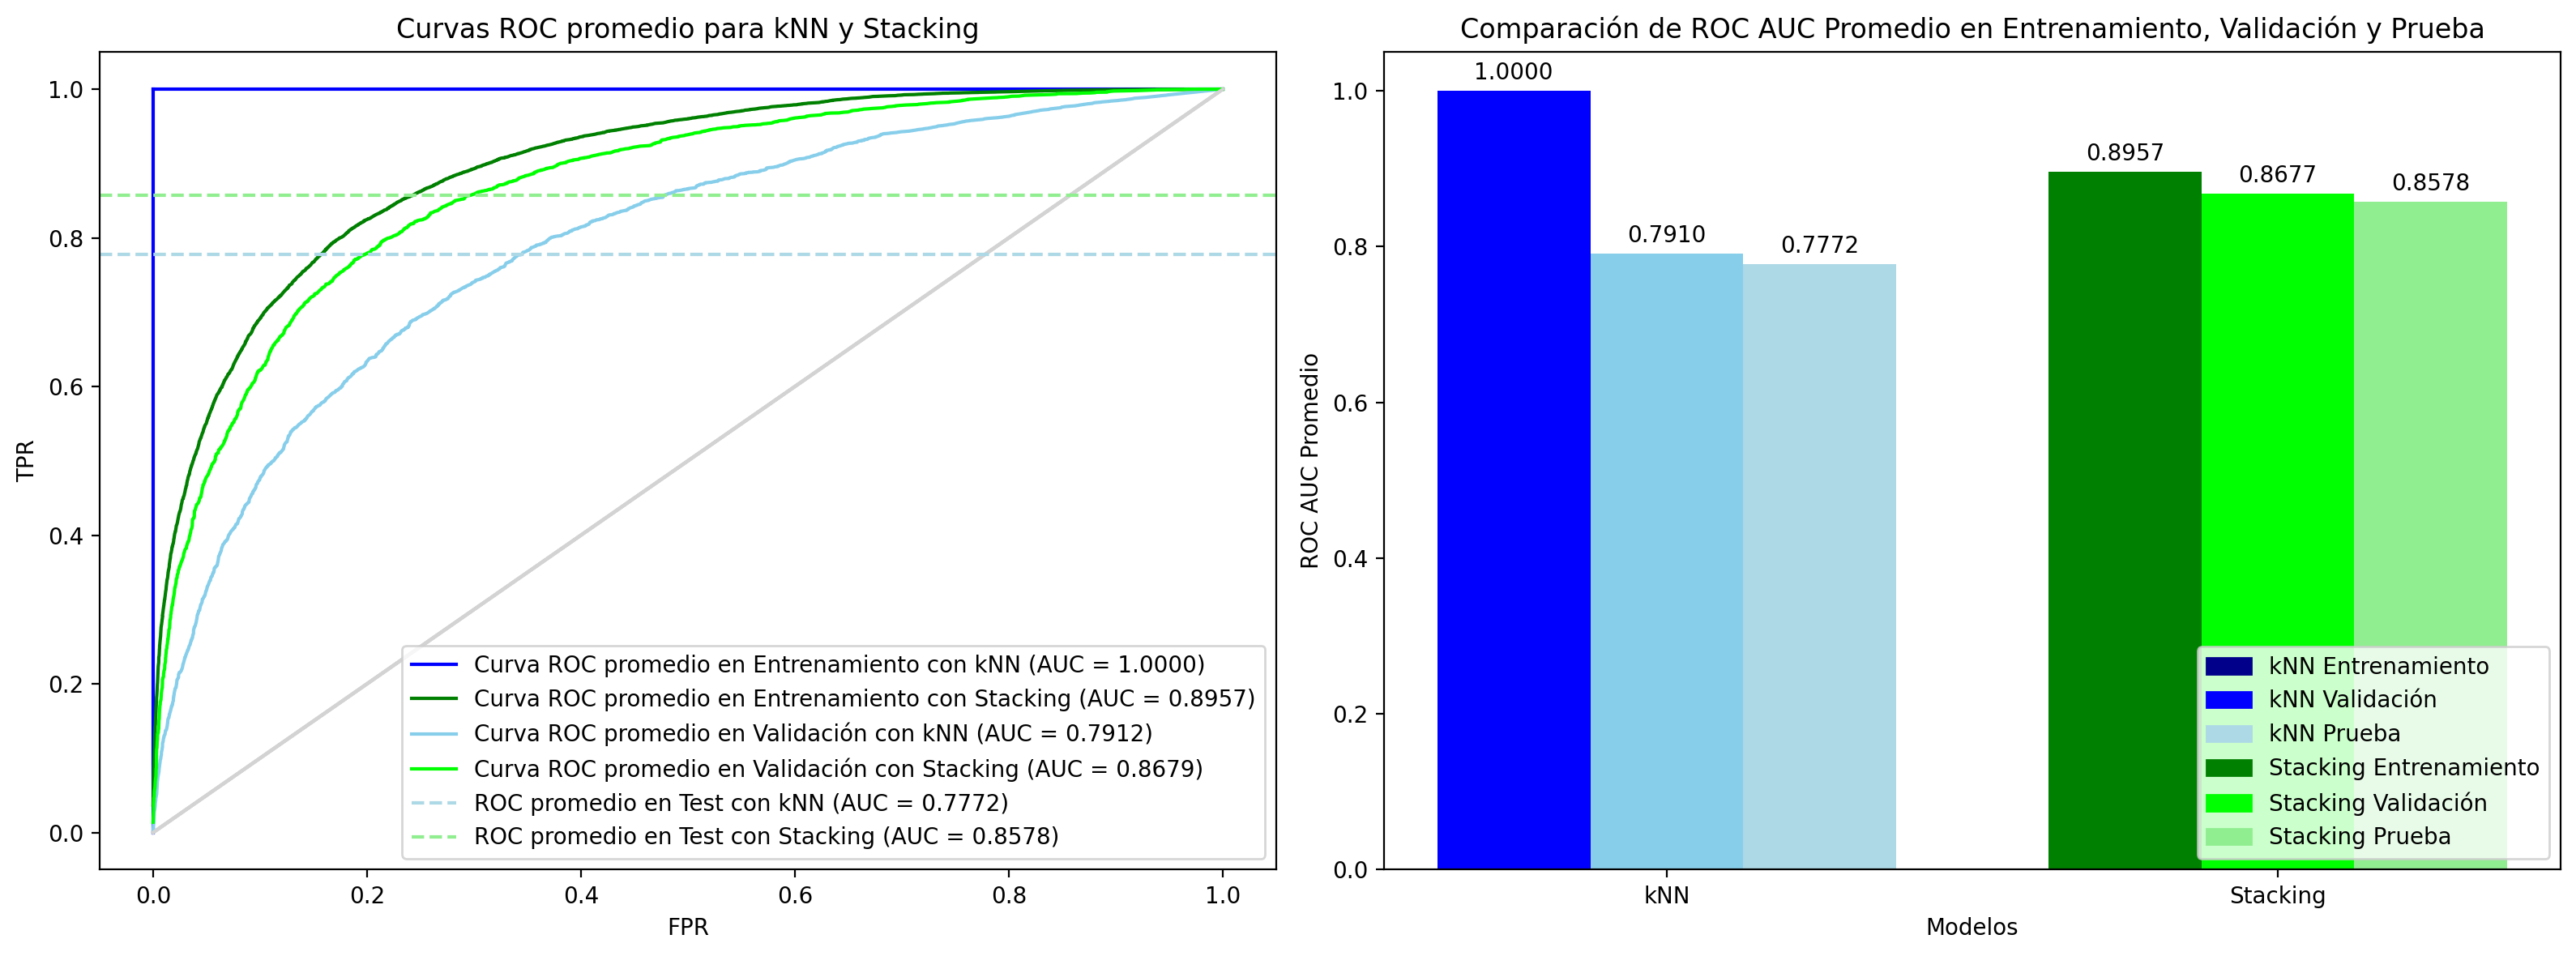

In [136]:
# Calcular las curvas ROC para cada etiqueta y cada modelo en entrenamiento
fpr_knn_train = dict()
tpr_knn_train = dict()
roc_auc_knn_train = dict()

fpr_stacking_train = dict()
tpr_stacking_train = dict()
roc_auc_stacking_train = dict()

for i, label in enumerate(y_train.columns):
    fpr_knn_train[label], tpr_knn_train[label], _ = roc_curve(y_train[label], y_preds_knn_train[label])
    roc_auc_knn_train[label] = roc_auc_score(y_train[label], y_preds_knn_train[label])
    
    fpr_stacking_train[label], tpr_stacking_train[label], _ = roc_curve(y_train[label], y_preds_stacking_train[label])
    roc_auc_stacking_train[label] = roc_auc_score(y_train[label], y_preds_stacking_train[label])

# Interpolar todas las curvas ROC en una curva promedio para kNN en entrenamiento
all_fpr_knn_train = np.unique(np.concatenate([fpr_knn_train[label] for label in y_train.columns]))
mean_tpr_knn_train = np.zeros_like(all_fpr_knn_train)

for label in y_train.columns:
    mean_tpr_knn_train += np.interp(all_fpr_knn_train, fpr_knn_train[label], tpr_knn_train[label])

mean_tpr_knn_train /= len(y_train.columns)
mean_auc_knn_train = auc(all_fpr_knn_train, mean_tpr_knn_train)

# Interpolar todas las curvas ROC en una curva promedio para Stacking en entrenamiento
all_fpr_stacking_train = np.unique(np.concatenate([fpr_stacking_train[label] for label in y_train.columns]))
mean_tpr_stacking_train = np.zeros_like(all_fpr_stacking_train)

for label in y_train.columns:
    mean_tpr_stacking_train += np.interp(all_fpr_stacking_train, fpr_stacking_train[label], tpr_stacking_train[label])

mean_tpr_stacking_train /= len(y_train.columns)
mean_auc_stacking_train = auc(all_fpr_stacking_train, mean_tpr_stacking_train)

# Calcular las curvas ROC para cada etiqueta y cada modelo en validación
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

fpr_stacking = dict()
tpr_stacking = dict()
roc_auc_stacking = dict()

for i, label in enumerate(y_val.columns):
    fpr_knn[label], tpr_knn[label], _ = roc_curve(y_val[label], y_preds_knn[label])
    roc_auc_knn[label] = roc_auc_score(y_val[label], y_preds_knn[label])
    
    fpr_stacking[label], tpr_stacking[label], _ = roc_curve(y_val[label], y_preds_stacking[label])
    roc_auc_stacking[label] = roc_auc_score(y_val[label], y_preds_stacking[label])

# Interpolar todas las curvas ROC en una curva promedio para kNN en validación
all_fpr_knn = np.unique(np.concatenate([fpr_knn[label] for label in y_val.columns]))
mean_tpr_knn = np.zeros_like(all_fpr_knn)

for label in y_val.columns:
    mean_tpr_knn += np.interp(all_fpr_knn, fpr_knn[label], tpr_knn[label])

mean_tpr_knn /= len(y_val.columns)
mean_auc_knn = auc(all_fpr_knn, mean_tpr_knn)

# Interpolar todas las curvas ROC en una curva promedio para Stacking en validación
all_fpr_stacking = np.unique(np.concatenate([fpr_stacking[label] for label in y_val.columns]))
mean_tpr_stacking = np.zeros_like(all_fpr_stacking)

for label in y_val.columns:
    mean_tpr_stacking += np.interp(all_fpr_stacking, fpr_stacking[label], tpr_stacking[label])

mean_tpr_stacking /= len(y_val.columns)
mean_auc_stacking = auc(all_fpr_stacking, mean_tpr_stacking)

# Valores de ROC promedio para validación y prueba
roc_auc_knn_val = 0.7910110140289365
roc_auc_knn_test = 0.7772
roc_auc_stacking_val = 0.8676961900275635
roc_auc_stacking_test = 0.8578

# Valores de ROC promedio para entrenamiento
roc_auc_knn_train = mean_auc_knn_train
roc_auc_stacking_train = mean_auc_stacking_train

# Datos para el gráfico de barras
models = ['kNN', 'Stacking']
roc_auc_train = [roc_auc_knn_train, roc_auc_stacking_train]
roc_auc_val = [roc_auc_knn_val, roc_auc_stacking_val]
roc_auc_test = [roc_auc_knn_test, roc_auc_stacking_test]

x = np.arange(len(models))  # Etiquetas de los modelos
width = 0.25  # Ancho de las barras

# Crear la figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=200)

# Gráfico 1: Curvas ROC promedio para ambos modelos y añadir la línea horizontal para el test
# Curva ROC promedio para kNN en entrenamiento
ax1.plot(all_fpr_knn_train, mean_tpr_knn_train, color='blue', label=f"Curva ROC promedio en Entrenamiento con kNN (AUC = {mean_auc_knn_train:.4f})")
ax1.plot([0, 1], [0, 1], color='lightgray', linestyle='-')
ax1.plot([0, 0], [0, 1], color='blue')

# Curva ROC promedio para Stacking en entrenamiento
ax1.plot(all_fpr_stacking_train, mean_tpr_stacking_train, color='green', label=f"Curva ROC promedio en Entrenamiento con Stacking (AUC = {mean_auc_stacking_train:.4f})")
ax1.plot([0, 1], [0, 1], color='lightgray', linestyle='-')

# Curva ROC promedio para kNN en validación
ax1.plot(all_fpr_knn, mean_tpr_knn, color='skyblue', label=f"Curva ROC promedio en Validación con kNN (AUC = {mean_auc_knn:.4f})")
ax1.plot([0, 1], [0, 1], color='lightgray', linestyle='-')

# Curva ROC promedio para Stacking en validación
ax1.plot(all_fpr_stacking, mean_tpr_stacking, color='lime', label=f"Curva ROC promedio en Validación con Stacking (AUC = {mean_auc_stacking:.4f})")
ax1.plot([0, 1], [0, 1], color='lightgray', linestyle='-')

# Línea horizontal para el ROC promedio del conjunto de test
ax1.axhline(y=0.7772, color='lightblue', linestyle='--', label=f"AUC promedio en Test con kNN (AUC = {0.7772:.4f})")
ax1.axhline(y=0.8578, color='lightgreen', linestyle='--', label=f"AUC promedio en Test con Stacking (AUC = {0.8578:.4f})")

ax1.set_ylabel('TPR')
ax1.set_xlabel('FPR')
ax1.set_title('Curvas ROC promedio para kNN y Stacking')
ax1.legend(loc="lower right")

# Gráfico 2: Comparación de ROC AUC Promedio en Entrenamiento, Validación y Prueba
bars1 = ax2.bar(x - width, roc_auc_train, width, label='Entrenamiento', color=['blue', 'green'])
bars2 = ax2.bar(x, roc_auc_val, width, label='Validación', color=['skyblue', 'lime'])
bars3 = ax2.bar(x + width, roc_auc_test, width, label='Prueba', color=['lightblue', 'lightgreen'])

# Añadir etiquetas y título
ax2.set_xlabel('Modelos')
ax2.set_ylabel('ROC AUC Promedio')
ax2.set_title('Comparación de ROC AUC Promedio en Entrenamiento, Validación y Prueba')
ax2.set_xticks(x)
ax2.set_xticklabels(models)

# Crear parches personalizados para la leyenda
legend_patches = [
    Patch(color='darkblue', label='kNN Entrenamiento'),
    Patch(color='blue', label='kNN Validación'),
    Patch(color='lightblue', label='kNN Prueba'),
    Patch(color='green', label='Stacking Entrenamiento'),
    Patch(color='lime', label='Stacking Validación'),
    Patch(color='lightgreen', label='Stacking Prueba')
]

ax2.legend(handles=legend_patches, loc='lower right')

# Añadir etiquetas de valor encima de las barras
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1, ax2)
add_labels(bars2, ax2)
add_labels(bars3, ax2)

plt.tight_layout()
plt.show()

A partir de estos datos, las conclusiones que podemos extraer son las siguientes:

La discrepancia observada en los valores de AUC entre los modelos kNN y Stacking en los conjuntos de entrenamiento, validación y test puede explicarse por el fenómeno de sobreajuste (overfitting).

1. **Sobreajuste en kNN:**

    - El modelo kNN ha obtenido un valor de AUC de 1 en el conjunto de entrenamiento, lo que indica que el modelo clasifica perfectamente todas las instancias en el conjunto de entrenamiento. Esto sugiere que el modelo ha memorizado los datos de entrenamiento, capturando incluso el ruido y las peculiaridades específicas de este conjunto.

    - Sin embargo, los valores de AUC más bajos en los conjuntos de validación y test indican que el modelo no generaliza bien a datos nuevos y no vistos. Esto es un claro signo de sobreajuste, donde el modelo tiene un rendimiento excelente en el conjunto de entrenamiento pero falla en generalizar a otros conjuntos de datos.

2. **Mejor Generalización en Stacking:**

    - El modelo Stacking ha obtenido mejores resultados en los conjuntos de validación y test, lo que sugiere que este modelo generaliza mejor a datos nuevos y no vistos.

    - Aunque el modelo Stacking puede no tener un valor de AUC perfecto en el conjunto de entrenamiento, su capacidad para mantener un rendimiento alto en los conjuntos de validación y test indica que ha aprendido patrones más generales y robustos en los datos, evitando el sobreajuste.

El valor de AUC de 1 en el conjunto de entrenamiento para el modelo kNN indica un sobreajuste, donde el modelo ha memorizado los datos de entrenamiento pero no puede generalizar bien a nuevos datos. Por otro lado, el modelo Stacking, con mejores valores de AUC en los conjuntos de validación y test, demuestra una mejor capacidad de generalización, lo que lo hace más confiable para predecir en datos no vistos.

Finalmente, como conclusiones a todo el proceso realizado, hemos evaluado y comparado dos modelos de clasificación: kNN y Stacking, utilizando los conjuntos de datos de entrenamiento, validación y prueba. El modelo kNN ha mostrado un valor de AUC de 1 en el conjunto de entrenamiento, lo que indica un sobreajuste significativo. Aunque el modelo ha memorizado perfectamente los datos de entrenamiento, su rendimiento en los conjuntos de validación y prueba ha sido inferior, con valores de AUC menores. Esto sugiere que kNN no generaliza bien a datos nuevos y no vistos.

Por otro lado, el modelo Stacking ha obtenido mejores resultados en los conjuntos de validación y prueba en comparación con kNN. Los valores de AUC más altos en estos conjuntos indican que Stacking tiene una mejor capacidad de generalización y es más robusto frente a datos no vistos. La combinación de múltiples modelos base en un enfoque de Stacking ha permitido capturar patrones más generales y evitar el sobreajuste, demostrando ser superior en términos de rendimiento general.

Para mejorar los resultados obtenidos, se podrían explorar más exhaustivamente los hiperparámetros de ambos modelos para encontrar configuraciones que optimicen el rendimiento en los conjuntos de validación y prueba. Además, mejorar el preprocesamiento de los datos, como la normalización, el manejo de valores atípicos y la imputación de valores faltantes de formas diversas, podría beneficiar el rendimiento de los modelos. Esto lo hemos ido comprobando en todo el proceso, ya que con los distintos tipos de preprocesamiento realizados hemos ido obteniendo mejores resultados y, de momento, este final que hemos empleado ha sido el que mejores resultados ha dado. Aunque kNN y Stacking fueron los algoritmos asignados para esta práctica, en un contexto más amplio, se podrían considerar otros algoritmos como Random Forest, Gradient Boosting, o redes neuronales para comparar y potencialmente mejorar los resultados.

En resumen, el modelo Stacking ha demostrado ser más efectivo y robusto en términos de generalización y rendimiento en los conjuntos de validación y prueba en comparación con kNN. Aunque kNN ha mostrado un rendimiento perfecto en el conjunto de entrenamiento, su sobreajuste lo hace menos adecuado para datos no vistos. Con ajustes adicionales en los hiperparámetros y el preprocesamiento de datos, ambos modelos podrían mejorar, pero Stacking ya ha mostrado una ventaja clara en esta práctica.